In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [2]:
df = pd.read_csv("Flight Prediction Data")
df.head()

,Unnamed: 0,Airline,Date,Departure_Time,Source,Arrival_Time,Destination,Stops,Duration,Price,Class Type
0,0,Air Asia,"Thu, 5 Jan 2023",19:40,Mumbai,01:25\n+ 1 day,New Delhi,1 Stop,5h 45m,"5,505",Economy
1,1,Air Asia,"Thu, 5 Jan 2023",21:50,Mumbai,08:40\n+ 1 day,New Delhi,1 Stop,10h 50m,"5,505",Economy
2,2,Air Asia,"Thu, 5 Jan 2023",20:35,Mumbai,08:40\n+ 1 day,New Delhi,1 Stop,12h 05m,"5,505",Economy
3,3,IndiGo,"Thu, 5 Jan 2023",23:15,Mumbai,01:25\n+ 1 day,New Delhi,Non Stop,2h 10m,"5,899",Economy
4,4,SpiceJet,"Thu, 5 Jan 2023",23:00,Mumbai,01:15\n+ 1 day,New Delhi,Non Stop,2h 15m,"5,938",Economy


In [3]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [4]:
df.tail()

,Airline,Date,Departure_Time,Source,Arrival_Time,Destination,Stops,Duration,Price,Class Type
1902,Vistara Business,"Thu, 12 Jan 2023",09:45,Mumbai,19:55,New Delhi,1 Stop,10h 10m,"63,804",Business
1903,Vistara Business,"Thu, 12 Jan 2023",06:45,Mumbai,19:55,New Delhi,1 Stop,13h 10m,"63,804",Business
1904,Vistara Business,"Thu, 12 Jan 2023",10:45,Mumbai,16:00,New Delhi,1 Stop,5h 15m,"66,469",Business
1905,Vistara Business,"Thu, 12 Jan 2023",06:20,Mumbai,16:00,New Delhi,1 Stop,9h 40m,"66,469",Business
1906,Vistara Business,"Thu, 12 Jan 2023",10:45,Mumbai,22:45,New Delhi,1 Stop,12h 00m,"66,469",Business


In [5]:
df['Day'] = df['Date'].map(lambda x :x[:3])

df['Date'] = df['Date'].map(lambda x :x[4:])

# Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         1907 non-null   object
 1   Date            1907 non-null   object
 2   Departure_Time  1907 non-null   object
 3   Source          1907 non-null   object
 4   Arrival_Time    1907 non-null   object
 5   Destination     1907 non-null   object
 6   Stops           1907 non-null   object
 7   Duration        1907 non-null   object
 8   Price           1907 non-null   object
 9   Class Type      1907 non-null   object
 10  Day             1907 non-null   object
dtypes: object(11)
memory usage: 164.0+ KB


In [7]:
df.dtypes

Airline           object
Date              object
Departure_Time    object
Source            object
Arrival_Time      object
Destination       object
Stops             object
Duration          object
Price             object
Class Type        object
Day               object
dtype: object

In [8]:
price = []
for i in df["Price"]:
    price.append(int(i.replace(',','')))
    
len(price)

1907

In [9]:
df['Price'] = price

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         1907 non-null   object
 1   Date            1907 non-null   object
 2   Departure_Time  1907 non-null   object
 3   Source          1907 non-null   object
 4   Arrival_Time    1907 non-null   object
 5   Destination     1907 non-null   object
 6   Stops           1907 non-null   object
 7   Duration        1907 non-null   object
 8   Price           1907 non-null   int64 
 9   Class Type      1907 non-null   object
 10  Day             1907 non-null   object
dtypes: int64(1), object(10)
memory usage: 164.0+ KB


In [11]:
df.isnull().sum()

Airline           0
Date              0
Departure_Time    0
Source            0
Arrival_Time      0
Destination       0
Stops             0
Duration          0
Price             0
Class Type        0
Day               0
dtype: int64

### data set does not contain any NaN

In [12]:
df.duplicated().sum()

2

In [13]:
# droping duplicate values
df.drop_duplicates(inplace=True)

### Dropped 2 Duplicate values

In [14]:
df.shape

(1905, 11)

### afetr droping 2 duplicate values dataset have 1905 rows and 10 columns

In [15]:
df.describe(include='all')

,Airline,Date,Departure_Time,Source,Arrival_Time,Destination,Stops,Duration,Price,Class Type,Day
count,1905,1905,1905,1905,1905,1905,1905,1905,1905.000000,1905,1905
unique,9,8,129,1,175,1,3,177,NaN,6,7
top,Vistara Premium Economy,12 Jan 2023,22:40,Mumbai,07:55\n+ 1 day,New Delhi,1 Stop,2h 15m,NaN,Economy,Thu
freq,352,302,76,1905,45,1905,1337,189,NaN,1070,426
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22238.244619,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16886.585742,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3976.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9056.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15603.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30237.000000,NaN,NaN


In [16]:
df["Class Type"].value_counts()

Economy             1070
Business             403
Premium Economy      231
Businss               80
 Premium Economy      61
Primeum Economy       60
Name: Class Type, dtype: int64

In [17]:
df['Class Type'] = df['Class Type'].replace(['Primeum Economy',' Premium Economy'],'Premium Economy')

In [18]:
df["Class Type"] = df['Class Type'].replace('Businss','Business')

In [19]:
 df["Class Type"].value_counts()

Economy            1070
Business            483
Premium Economy     352
Name: Class Type, dtype: int64

In [20]:
df['Duration'] = df['Duration'].map(lambda x : x.replace('05m','5m'))

In [21]:
df['Duration'] = df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [22]:
df['Duration']= pd.to_numeric(df['Duration'])

# Data Analysis

### After cleaning the data, you have to do some analysis on the data. 
1. Do airfares change frequently? Do they move in small increments or in large jumps?
2. Do they tend to go up or down over time?
3. What is the best time to buy so that the consumer can save the most by taking the least risk?
4. Does price increase as we get near to departure date?
5. Is Indigo cheaper than Jet Airways? Are 
6. morning flights expensive?


In [23]:
df.describe()

,Duration,Price
count,1905.000000,1905.000000
mean,576.790026,22238.244619
std,455.356049,16886.585742
min,110.000000,3976.000000
25%,140.000000,9056.000000
50%,450.000000,15603.000000
75%,835.000000,30237.000000
max,1665.000000,97891.000000


In [24]:
categorical_column = ['Airline','Date','Stops','Class Type','Day']

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Airline
Vistara Premium Economy    352
Vistara Business           300
Vistara                    278
IndiGo                     271
Air India Business         263
Air India                  233
Go First                   112
Air Asia                    62
SpiceJet                    34
Name: Airline, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


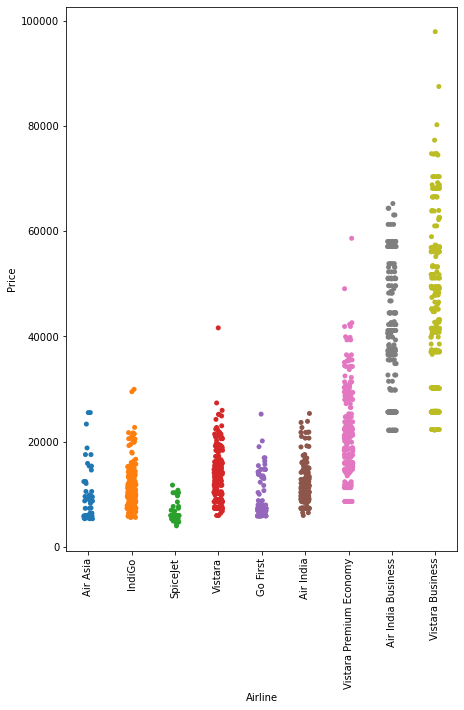

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Date
 12 Jan 2023    302
 9 Jan 2023     296
 8 Jan 2023     291
 10 Jan 2023    262
 11 Jan 2023    255
 7 Jan 2023     245
 6 Jan 2023     130
 5 Jan 2023     124
Name: Date, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


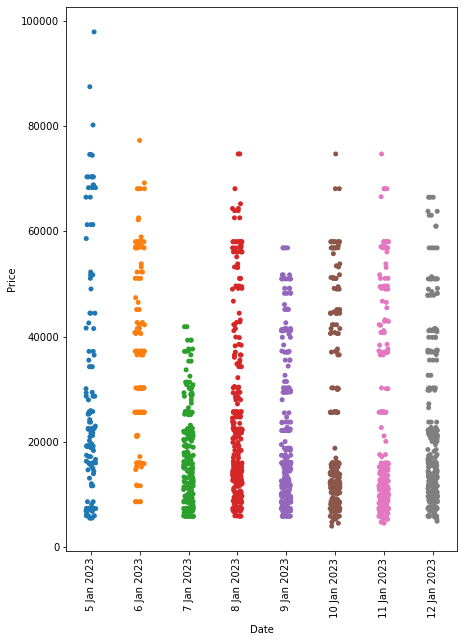

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Stops
1 Stop       1337
Non Stop      563
2 Stop(s)       5
Name: Stops, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


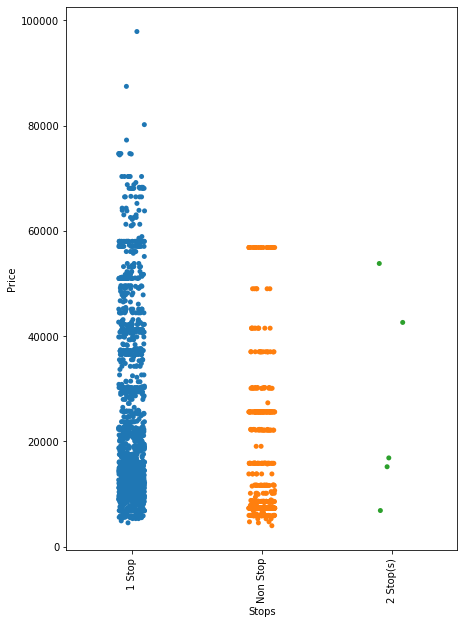

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Class Type
Economy            1070
Business            483
Premium Economy     352
Name: Class Type, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


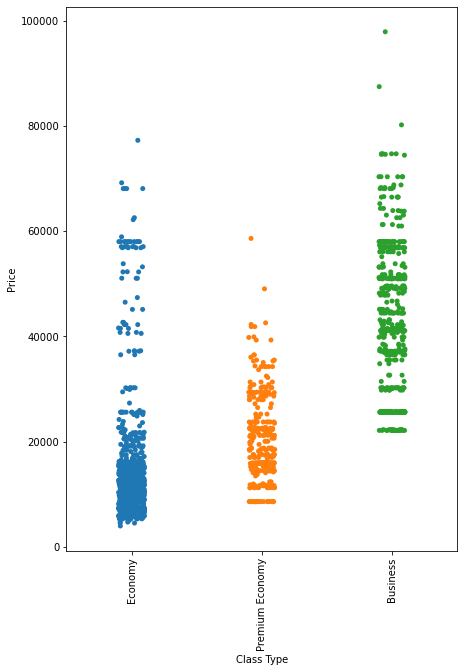

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Day
Thu    426
Mon    296
Sun    291
Tue    262
Wed    255
Sat    245
Fri    130
Name: Day, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


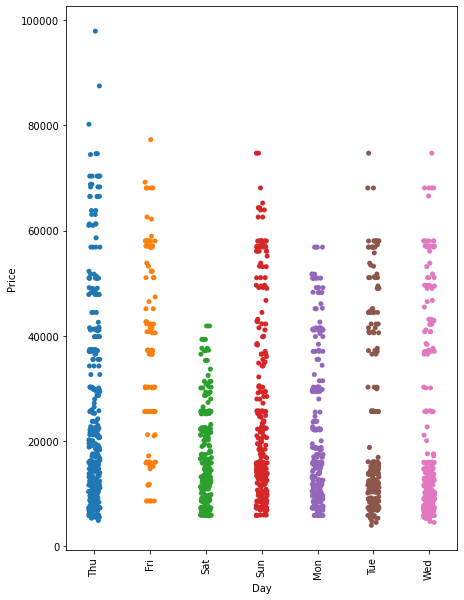

In [25]:
for i in categorical_column:
    print("*-"*50)
    print(i)
    print(df[i].value_counts())
    print("*-"*50)
    plt.figure(figsize=(7,10))
    sns.stripplot(x = df[i],y = df['Price'])
    plt.xticks(rotation= 90)
    plt.xlabel(i)
    plt.show()

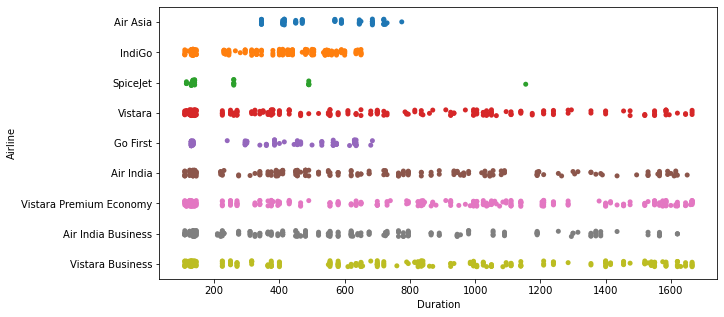

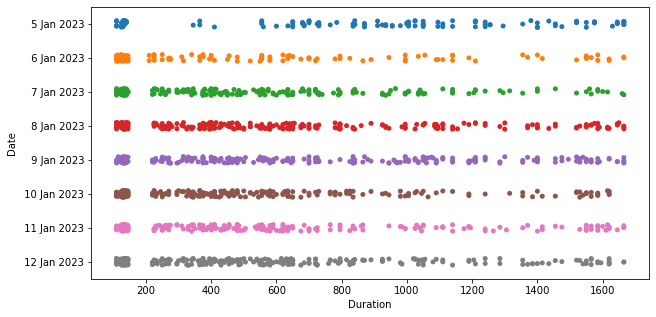

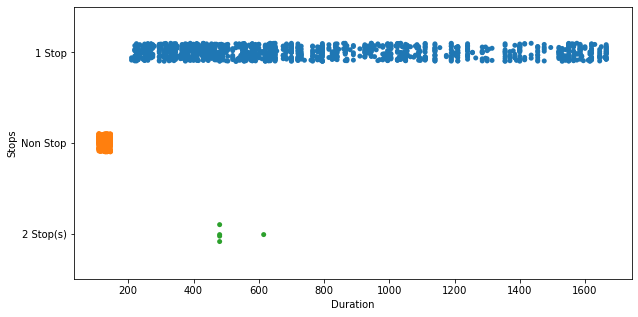

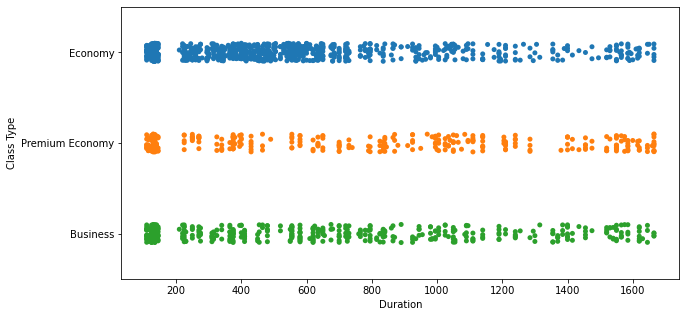

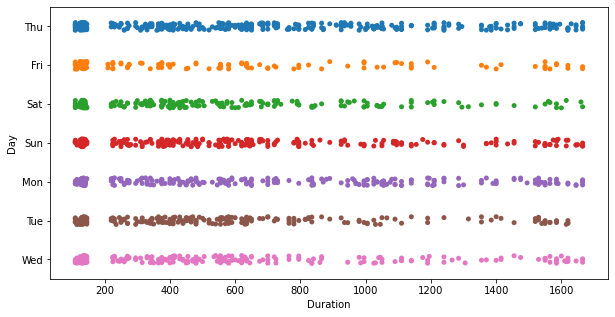

In [26]:
for i in categorical_column:
    plt.figure(figsize=(10,5))
    sns.stripplot(y = df[i],x = df['Duration'])
    plt.xticks()
    plt.xlabel('Duration')
    plt.show()

##### Observation strip plot
1.	Vistara business, air India business, and Vistara premium economy are the most expensive airline companies.
2.	Spicejet is the cheapest airline company.
3.	A one-stop flight is more expensive than a nonstop flight.
4.	Most flights are one-stop and nonstop; only five flights make two stops.
5.	There are fewer flights on Friday than on other days. 
6.	The following are the top airlines that offer regular flights from Mumbai to Delhi.

 •	Vistara Premium Economy    352
 •	Vistara Business           300
 •	Vistara                    278
 •	IndiGo                     271
 •	Air India Business         263
7.	Exact-day flight tickets are more expensive than another day.


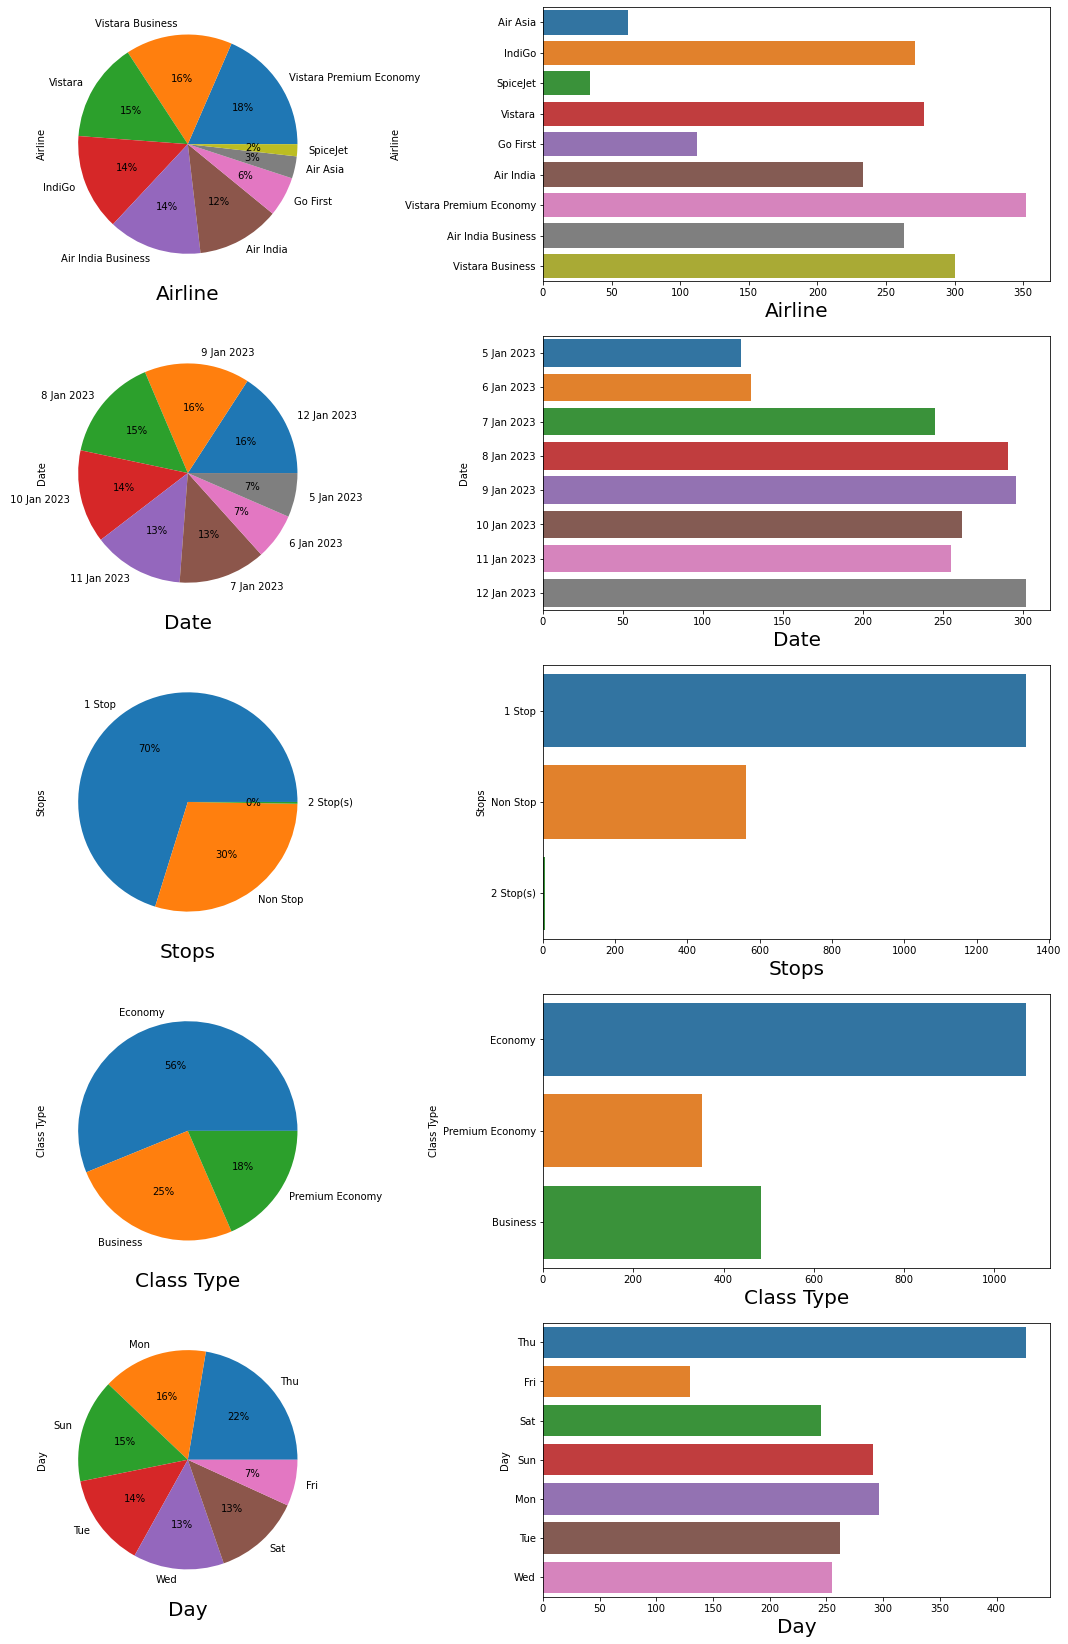

In [27]:
plt.figure(figsize=(20,120))
pltonumber = 1
for i in categorical_column:
    if pltonumber<=40:
        if pltonumber % 2 != 0:
            ax = plt.subplot(20,2,pltonumber)
            df[i].value_counts().plot(kind='pie',autopct='%.0f%%')
            plt.xlabel(i,fontsize=20)
            pltonumber += 1
            
        if pltonumber %2 == 0:
            ax = plt.subplot(20,2,pltonumber)
            sns.countplot(y=df[i])
            plt.xlabel(i,fontsize=20)
            pltonumber += 1
            
plt.show()

##### Observation pie plot and bar chart
1.	Vistara Airlines, Indigo Airlines, and Air India account for more than 75% of regular flights from Mumbai to Delhi. 
2.	70% of flights are from Mumbai to Delhi, with one stop in between.
3.	Less than 1% of flights from Mumbai to Delhi make two stops. 
4.	56% of seats are in economy class, and business and premium economy class seats are 25% and 18%, respectively.


Airline VS Date


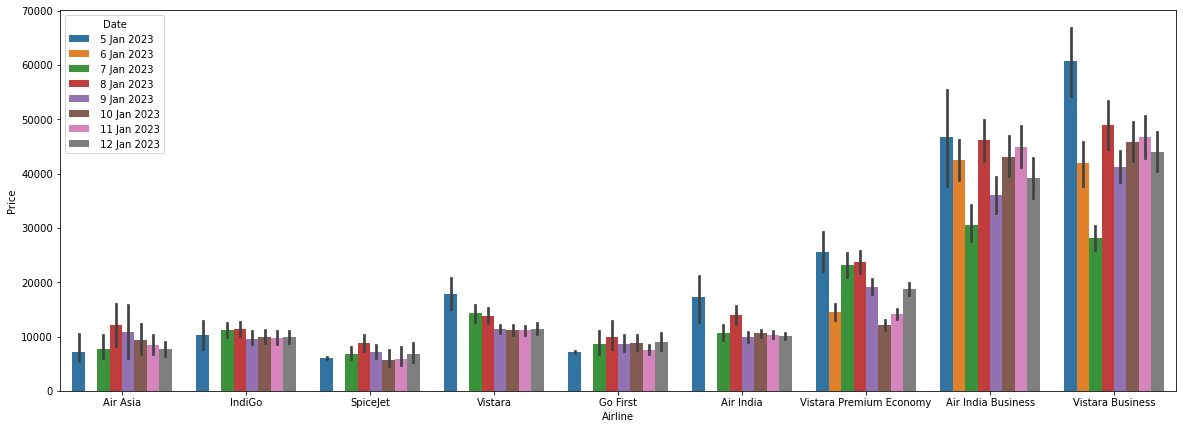

Airline VS Stops


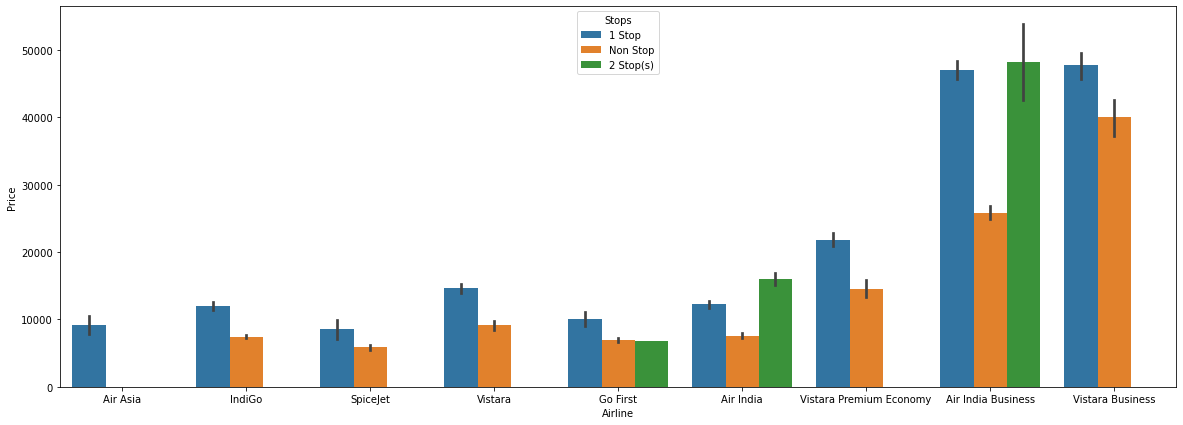

Airline VS Class Type


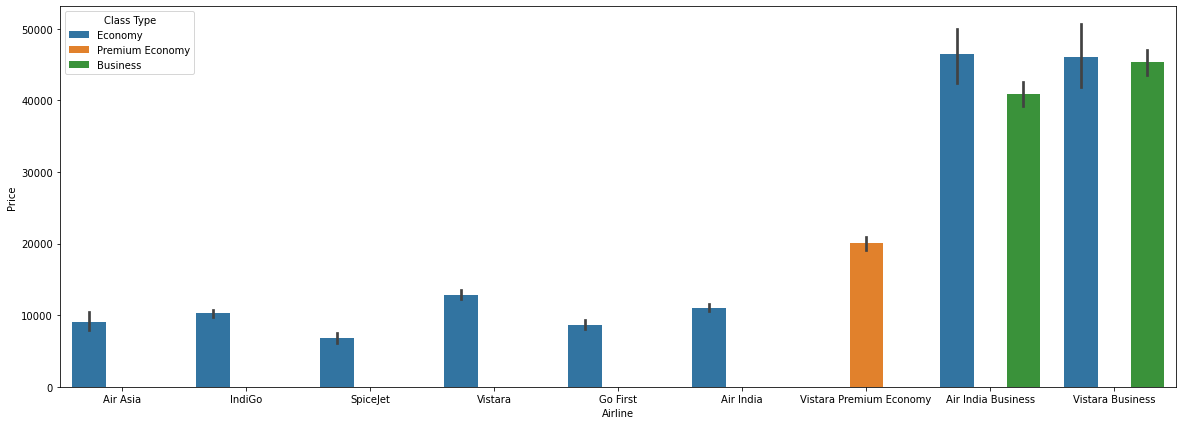

Airline VS Day


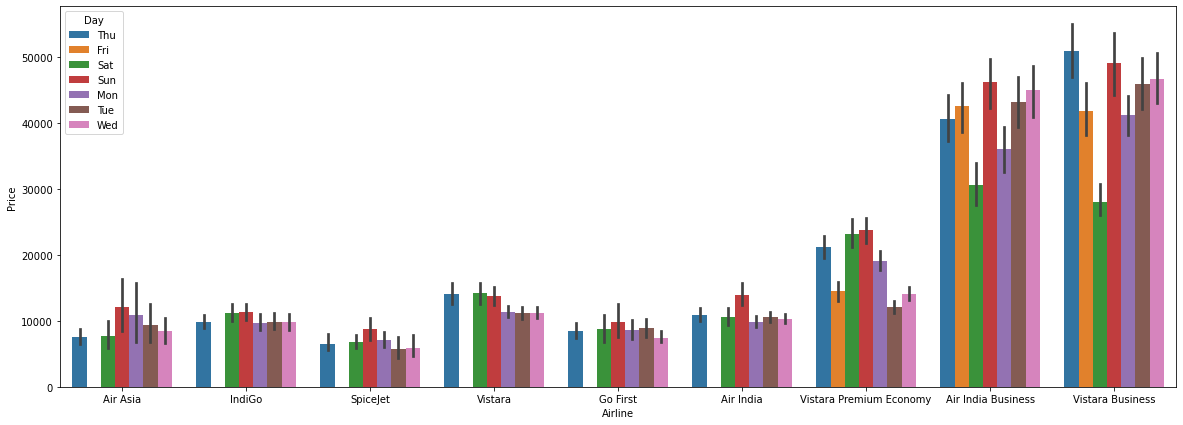

Date VS Airline


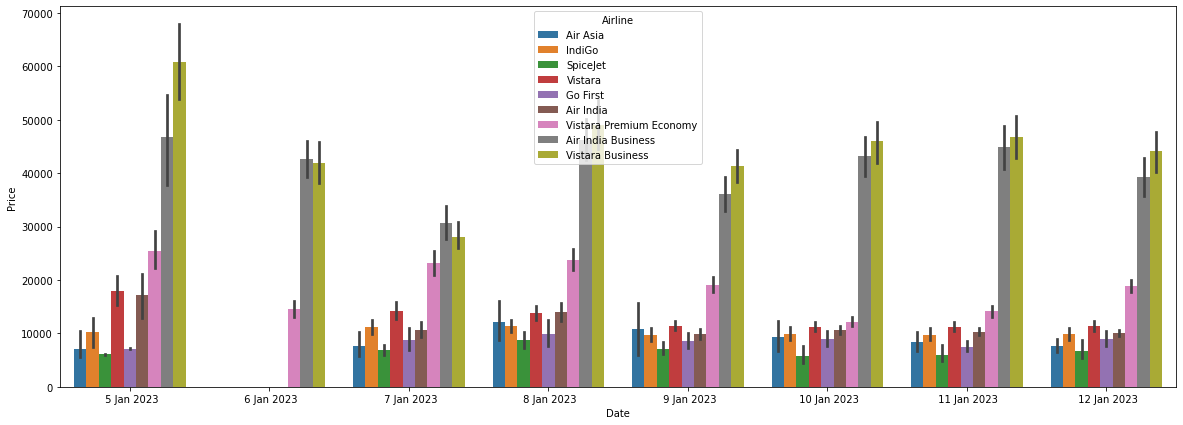

Date VS Stops


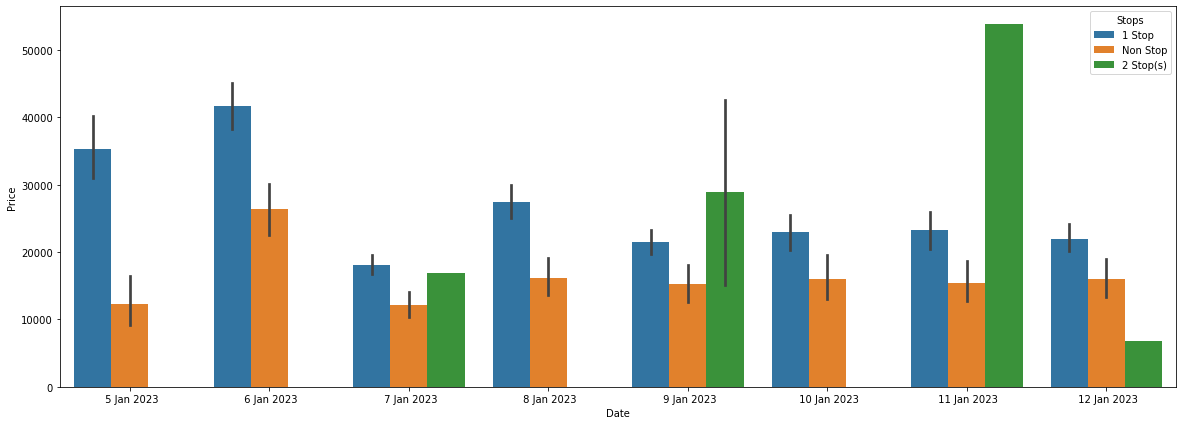

Date VS Class Type


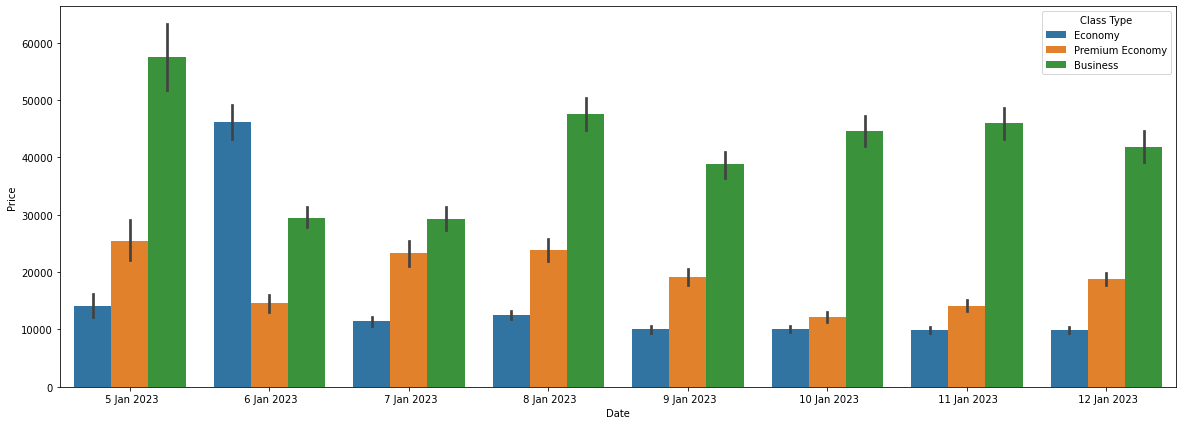

Date VS Day


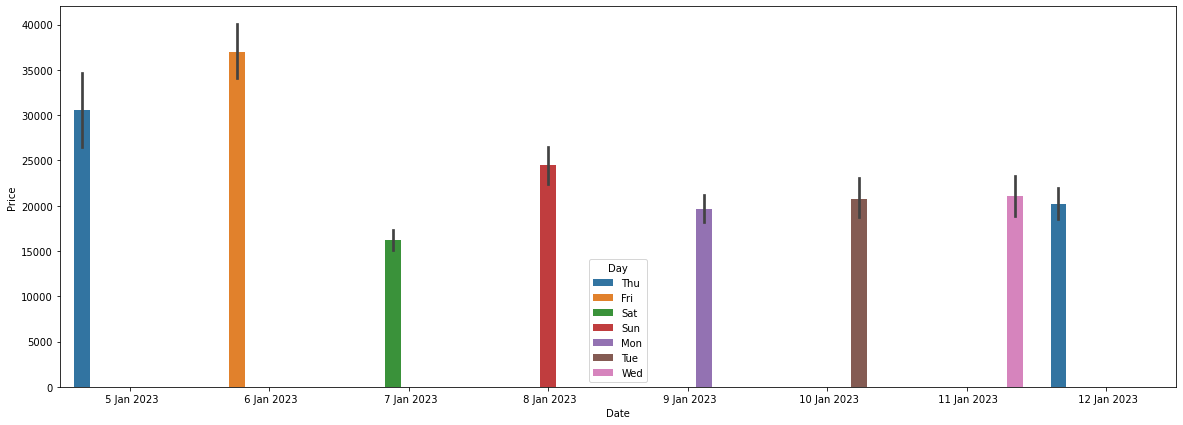

Stops VS Airline


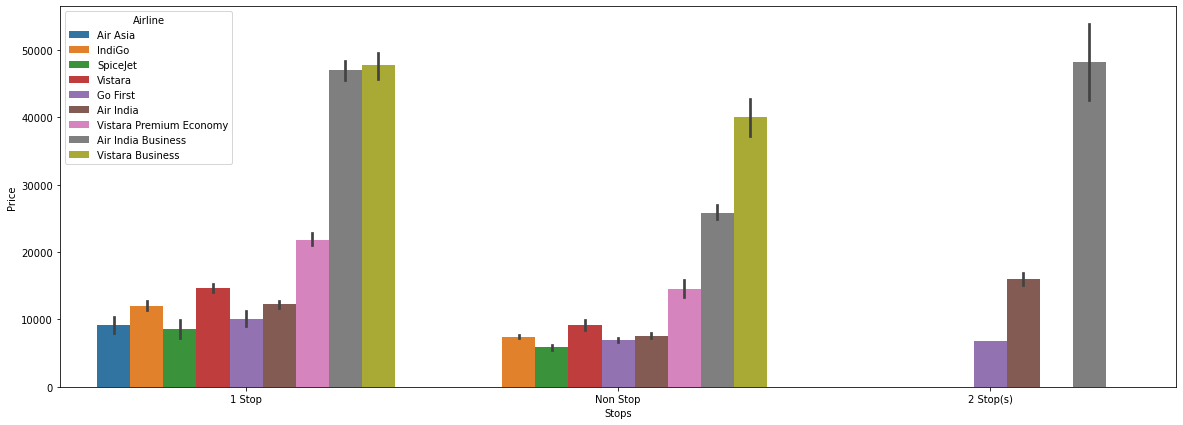

Stops VS Date


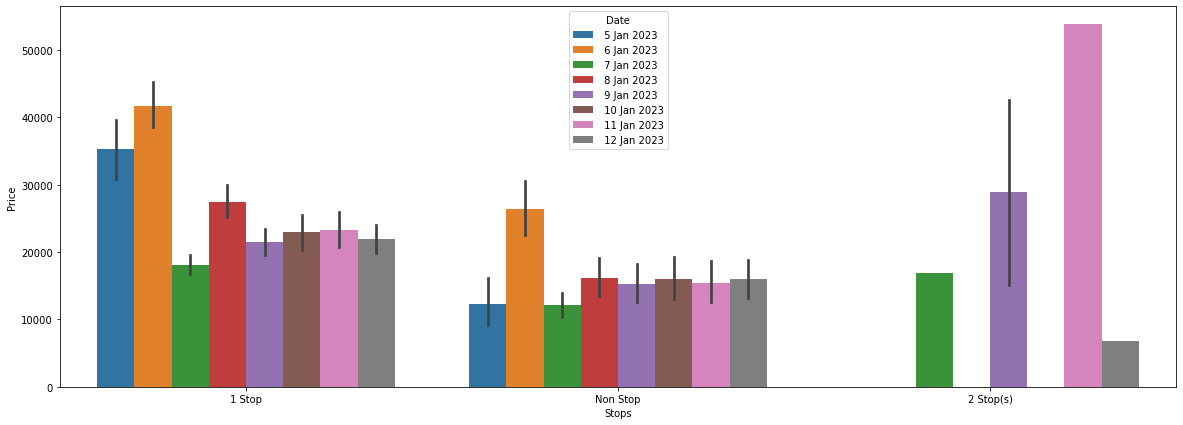

Stops VS Class Type


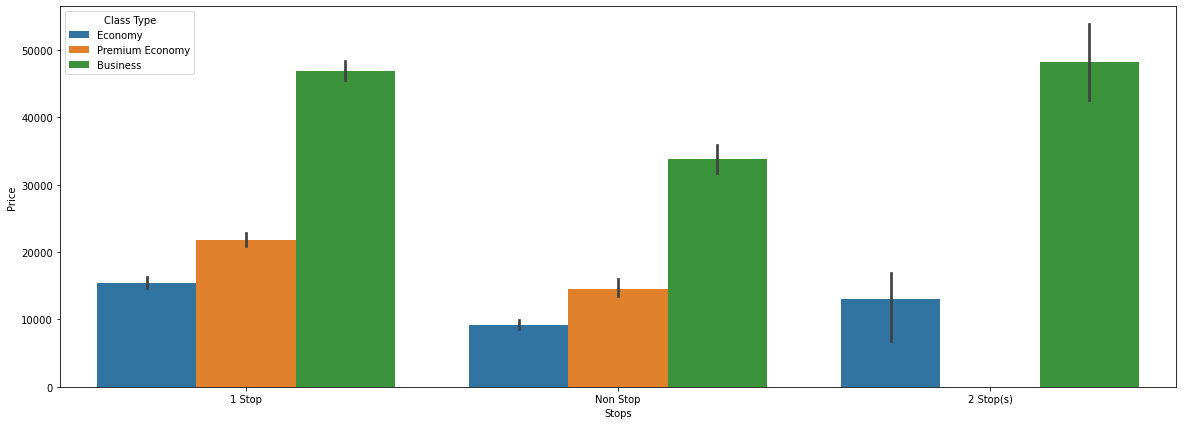

Stops VS Day


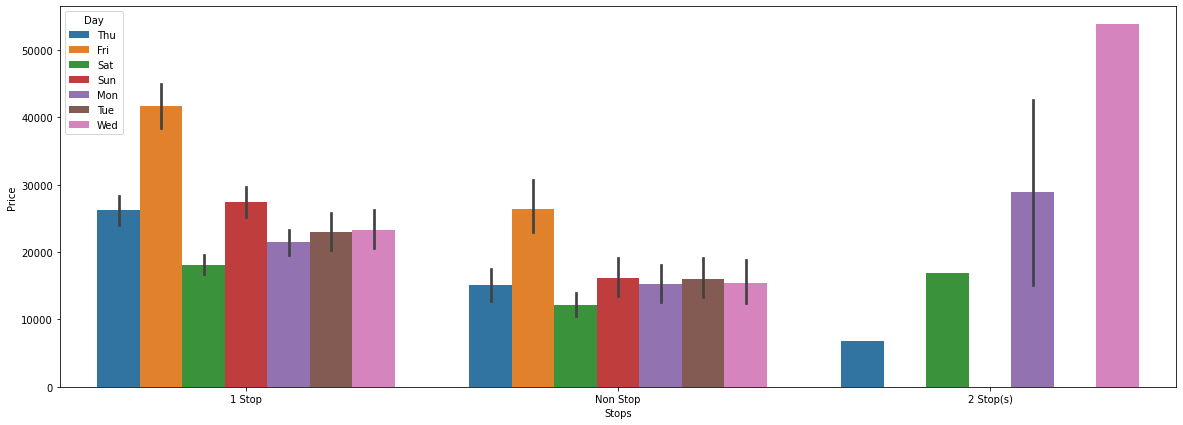

Class Type VS Airline


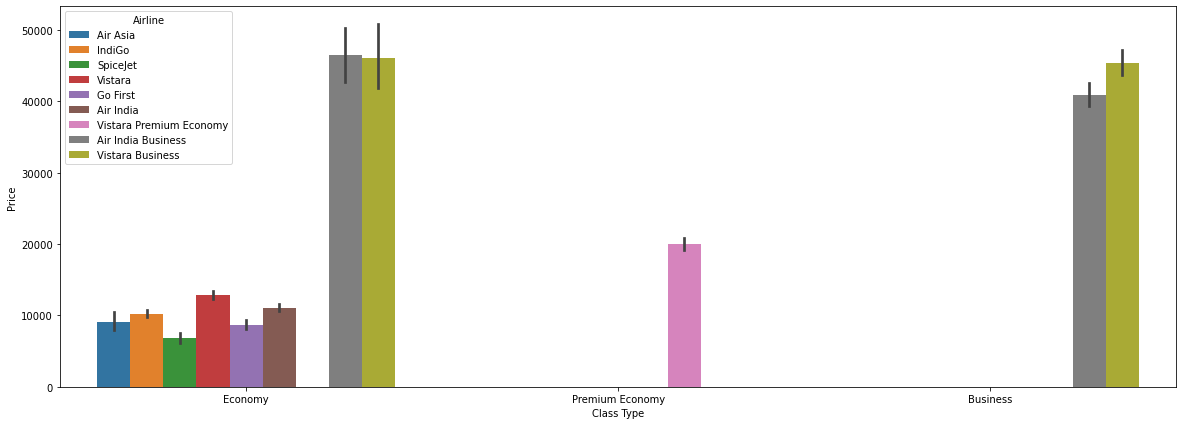

Class Type VS Date


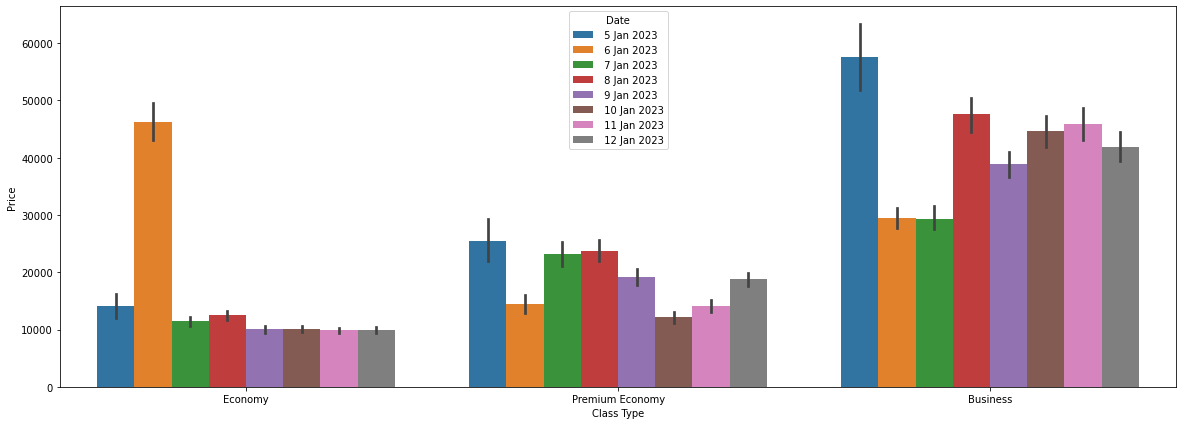

Class Type VS Stops


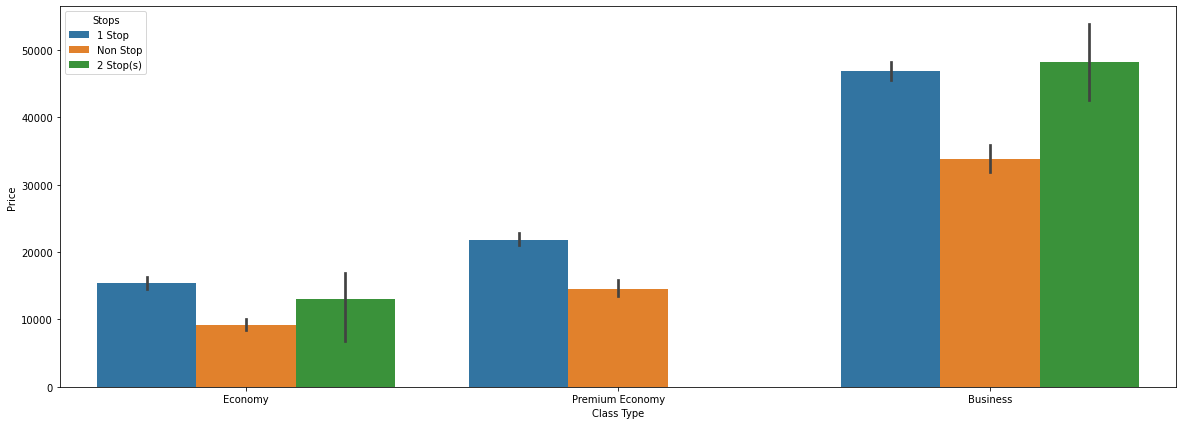

Class Type VS Day


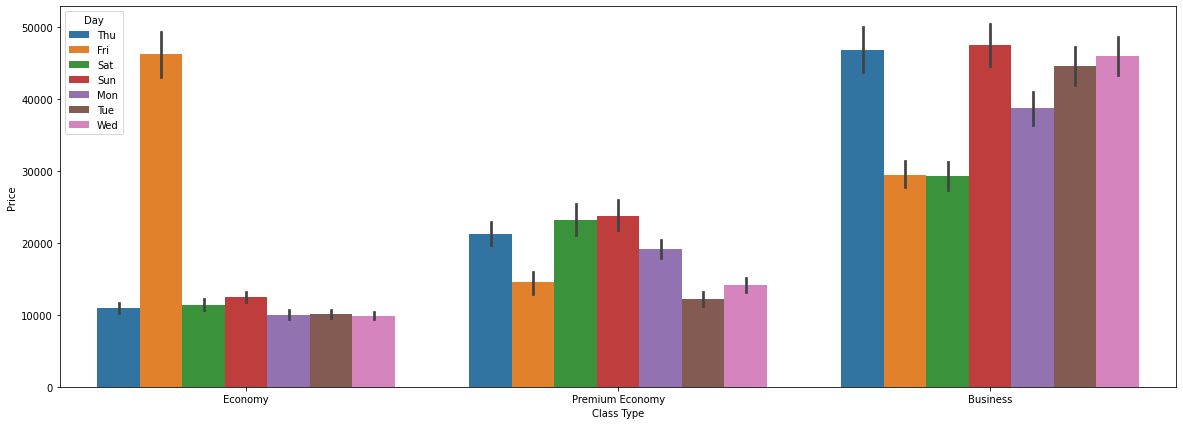

Day VS Airline


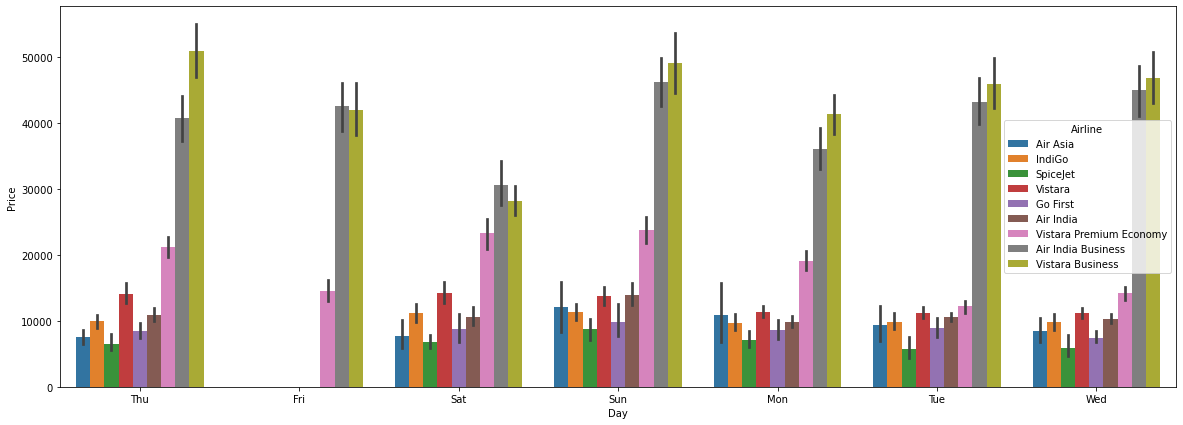

Day VS Date


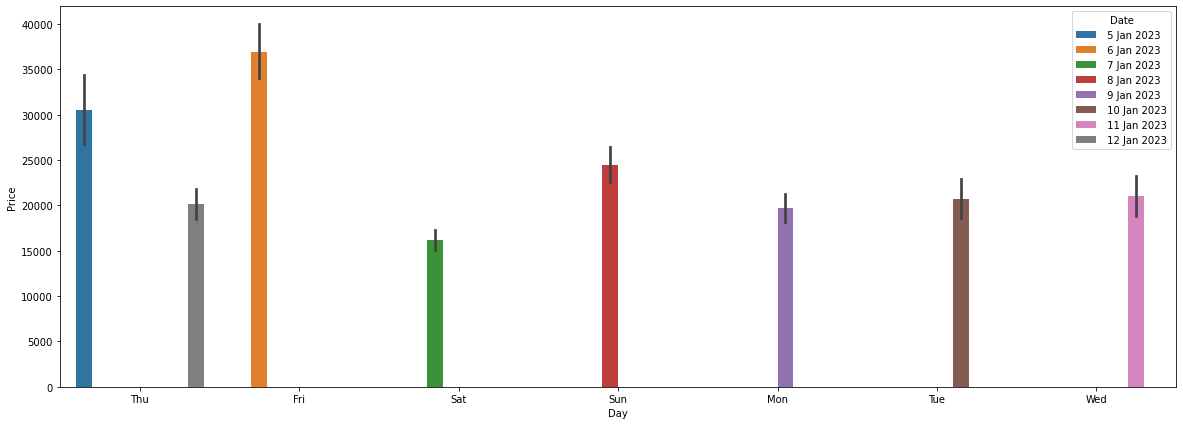

Day VS Stops


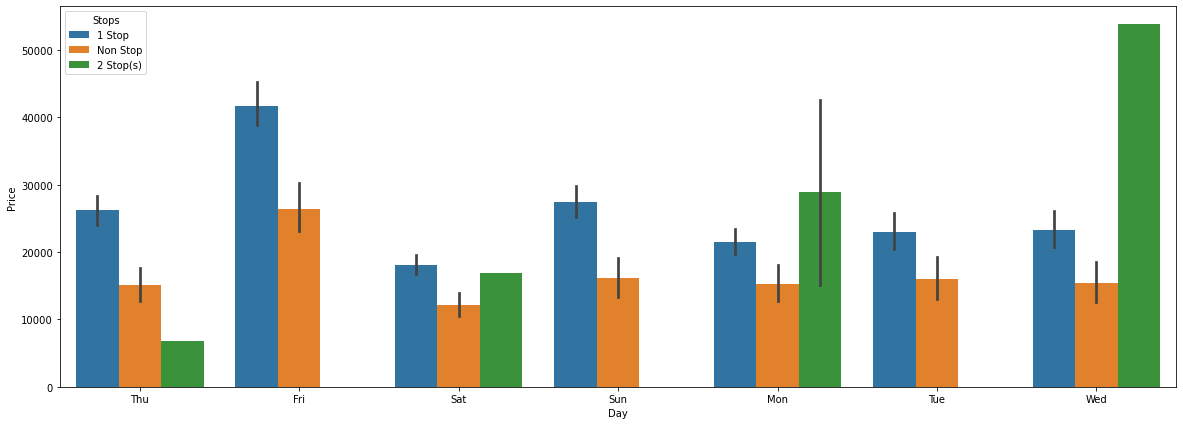

Day VS Class Type


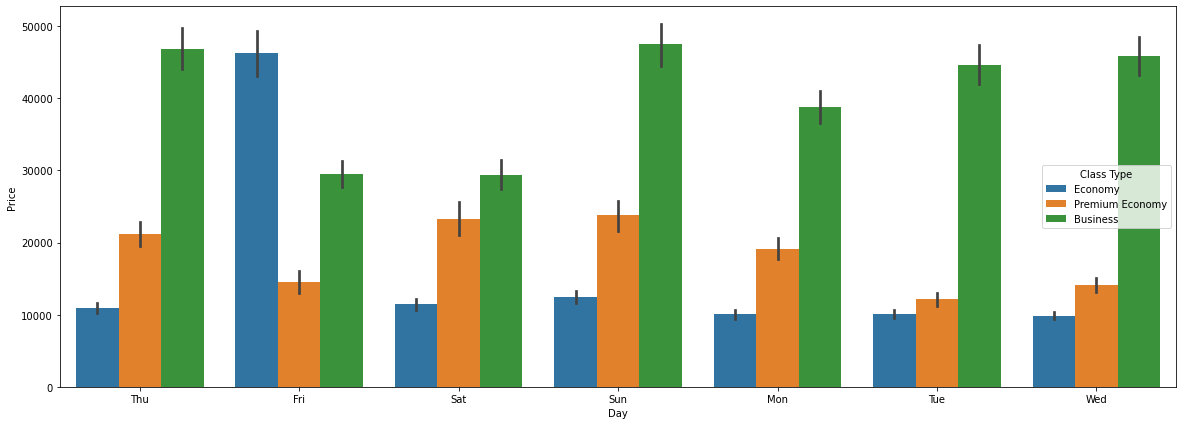

In [28]:
for i in categorical_column:
    for j in categorical_column:
        if i == j:
            continue
        print(i,'VS',j)
        plt.figure(figsize=(20,7))
        sns.barplot(x = df[i],y = df['Price'],hue=df[j])
        plt.xticks()
        plt.xlabel(i)
        plt.ylabel('Price')
        plt.show()

Airline VS Date


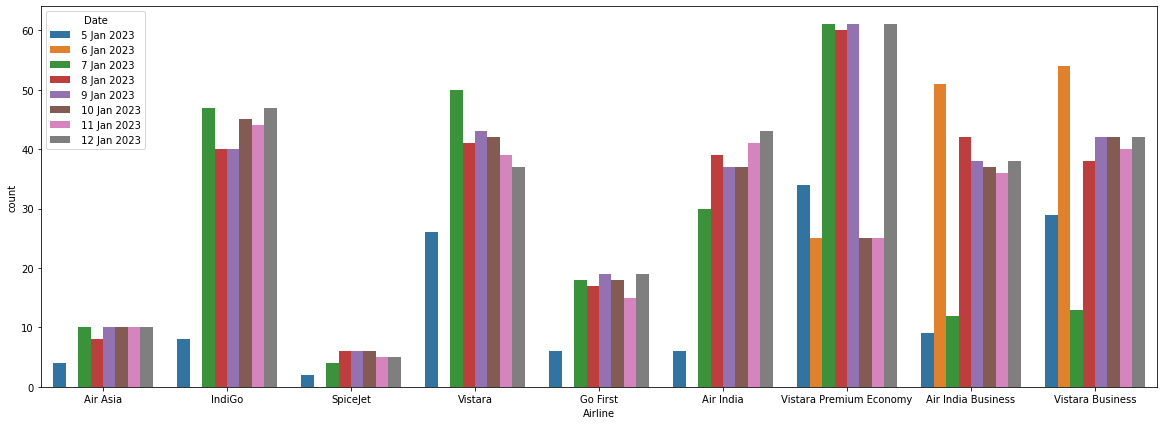

Airline VS Stops


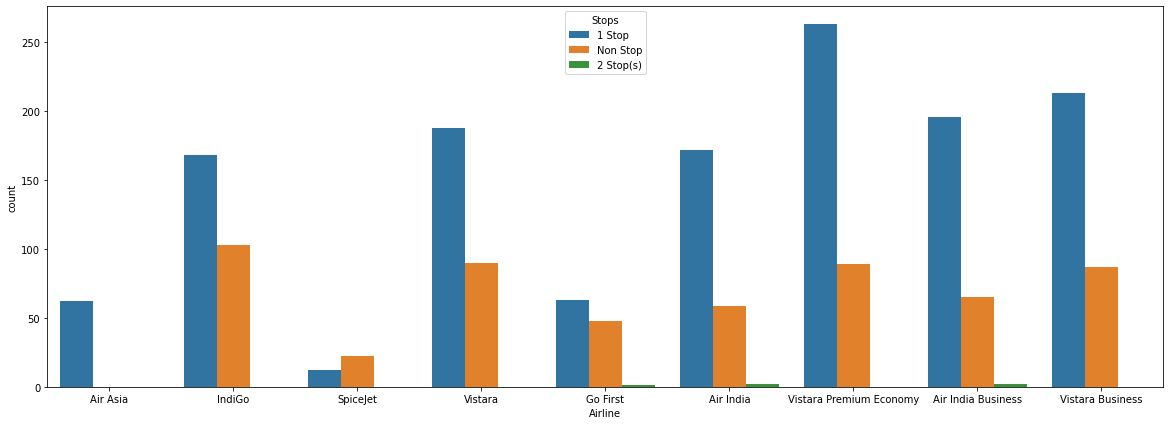

Airline VS Class Type


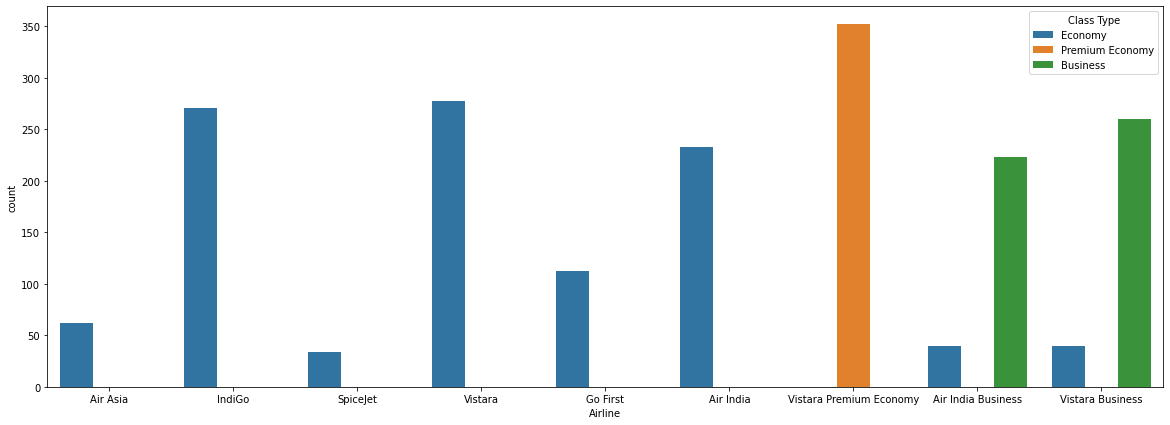

Airline VS Day


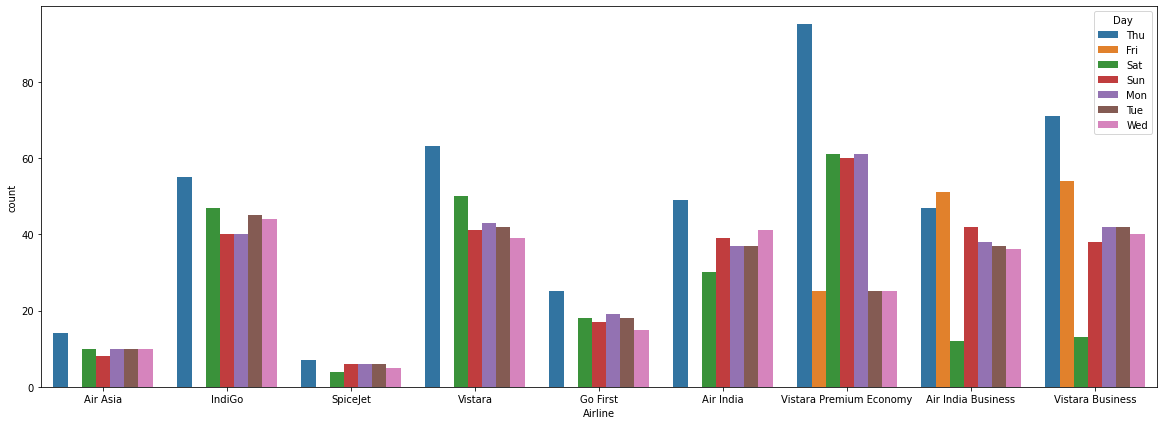

Date VS Airline


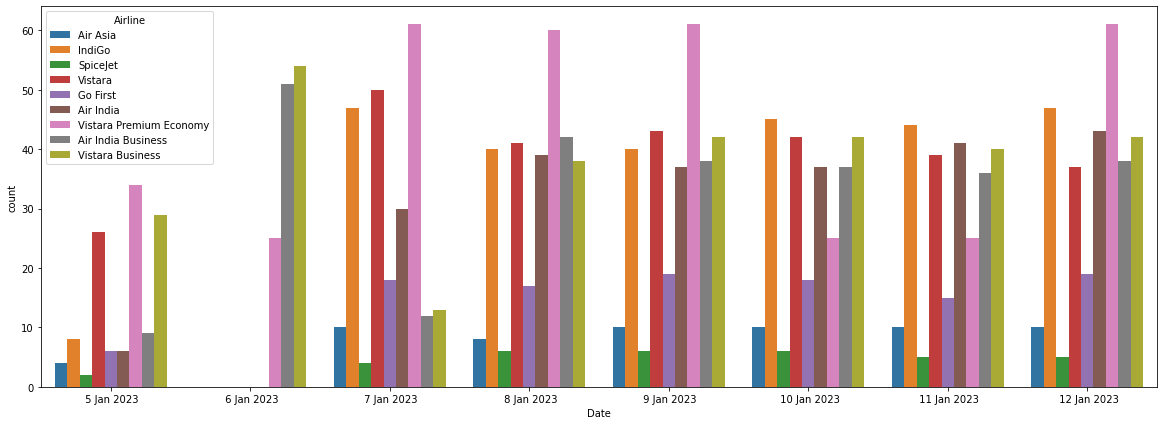

Date VS Stops


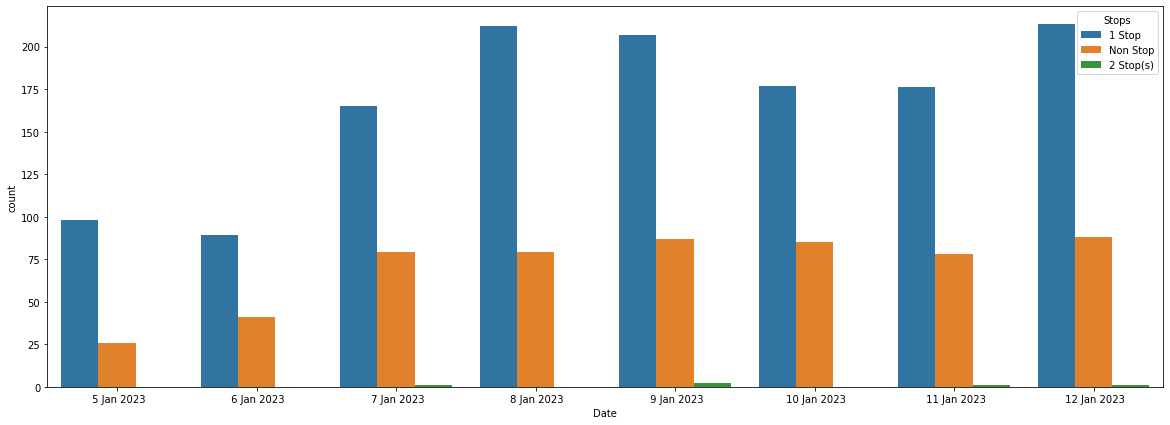

Date VS Class Type


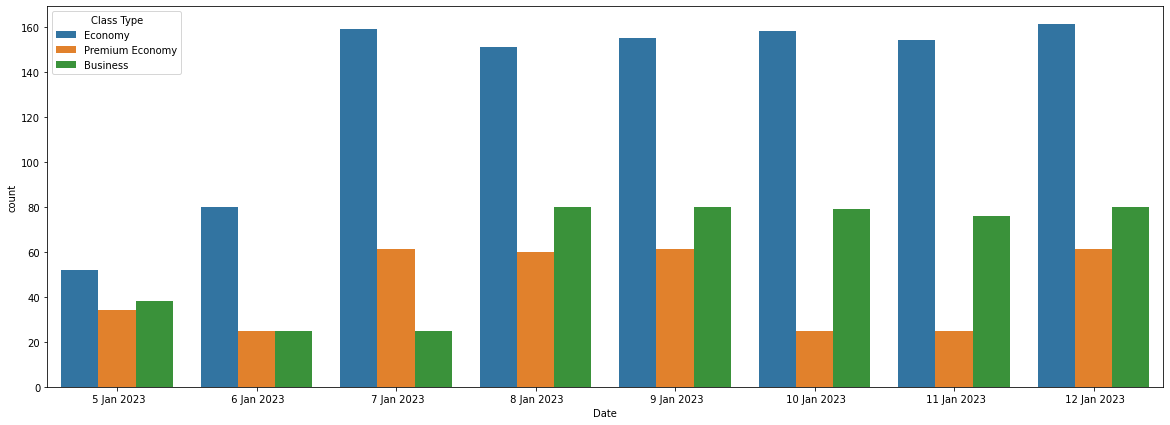

Date VS Day


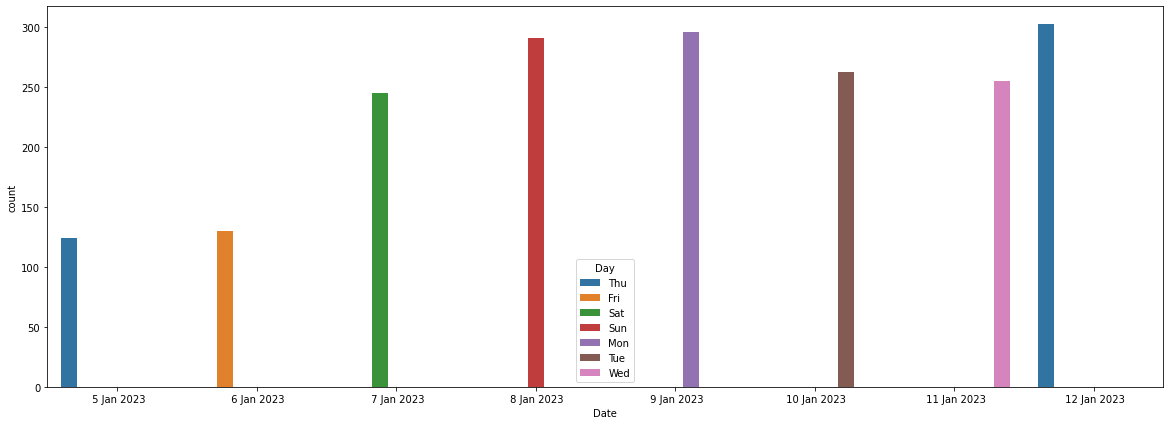

Stops VS Airline


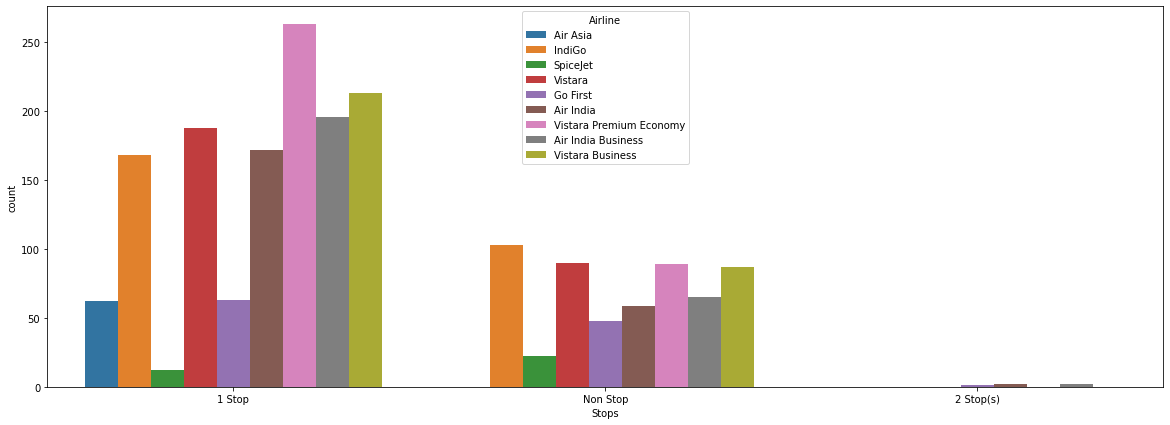

Stops VS Date


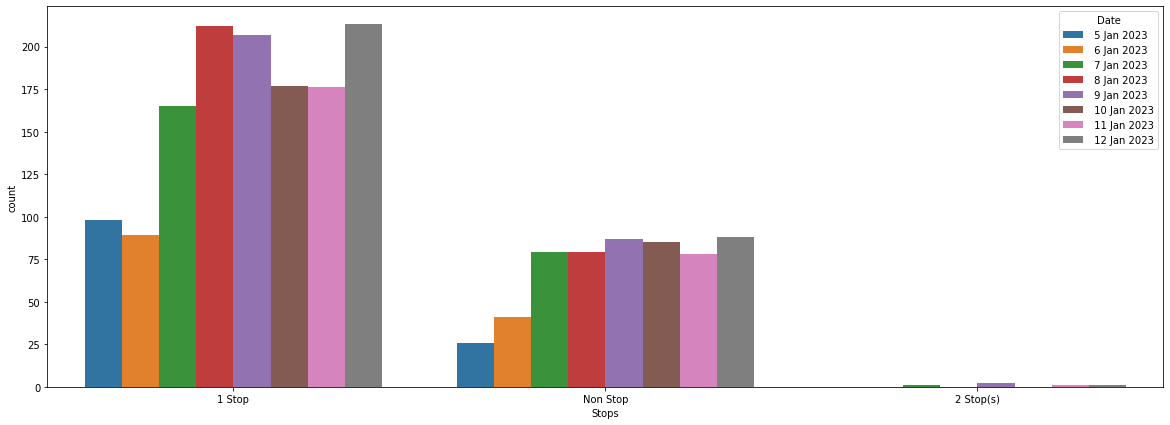

Stops VS Class Type


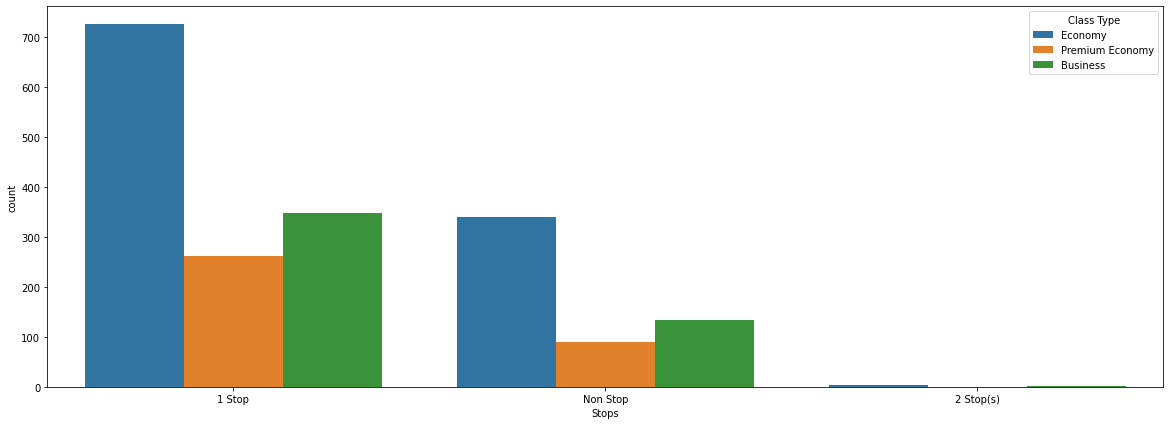

Stops VS Day


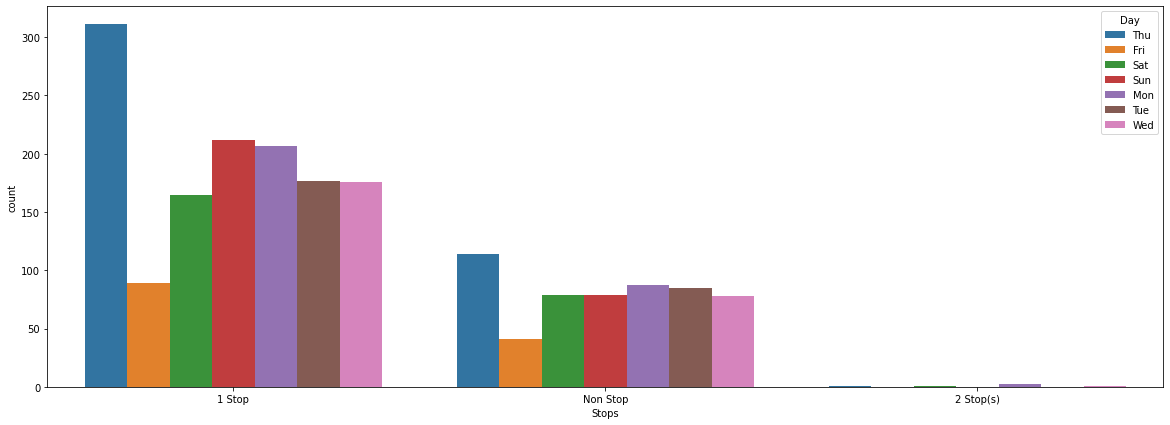

Class Type VS Airline


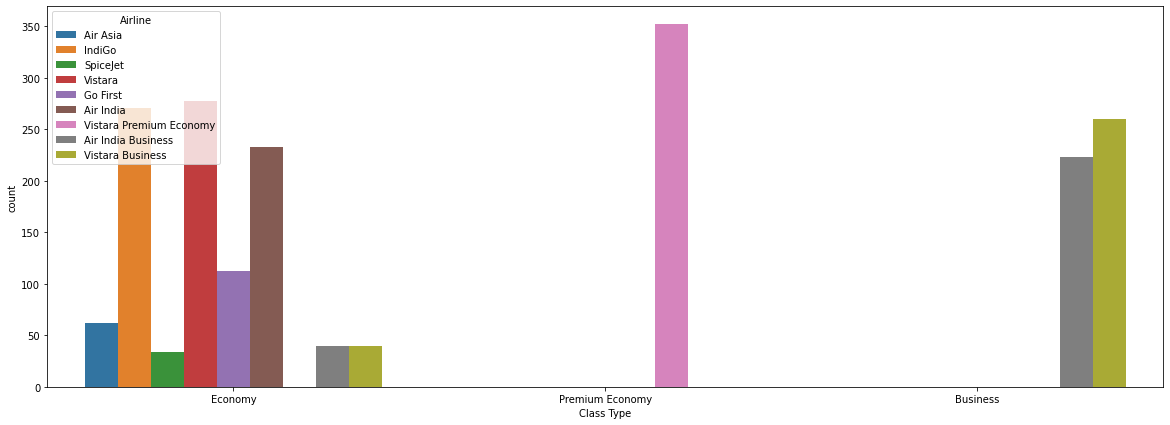

Class Type VS Date


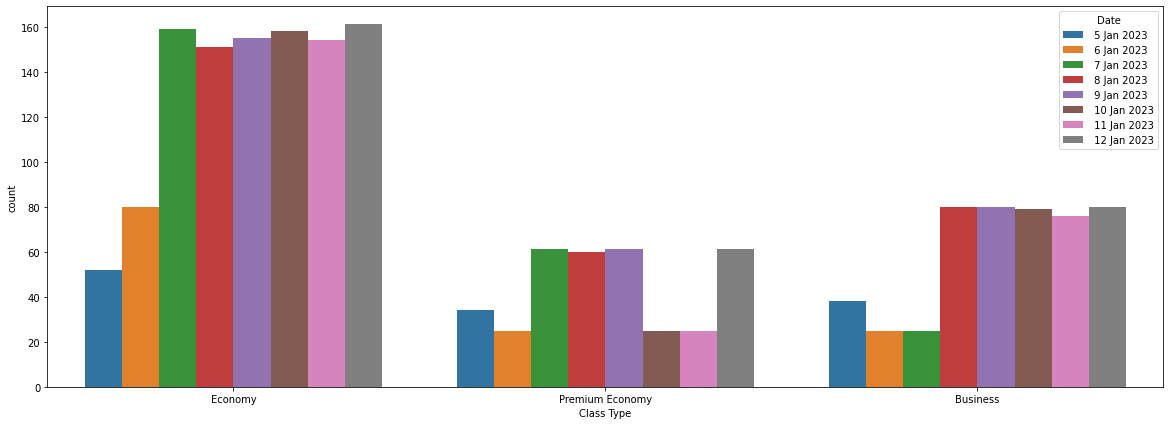

Class Type VS Stops


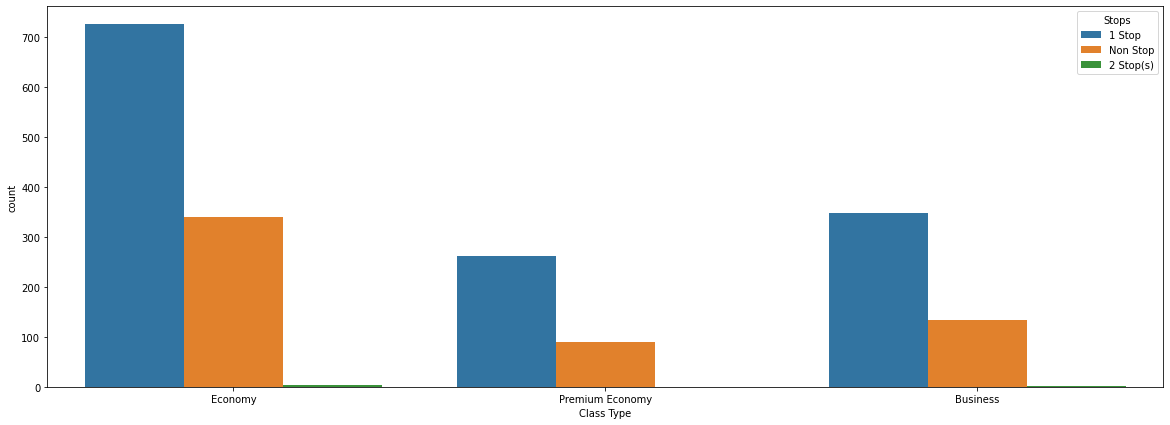

Class Type VS Day


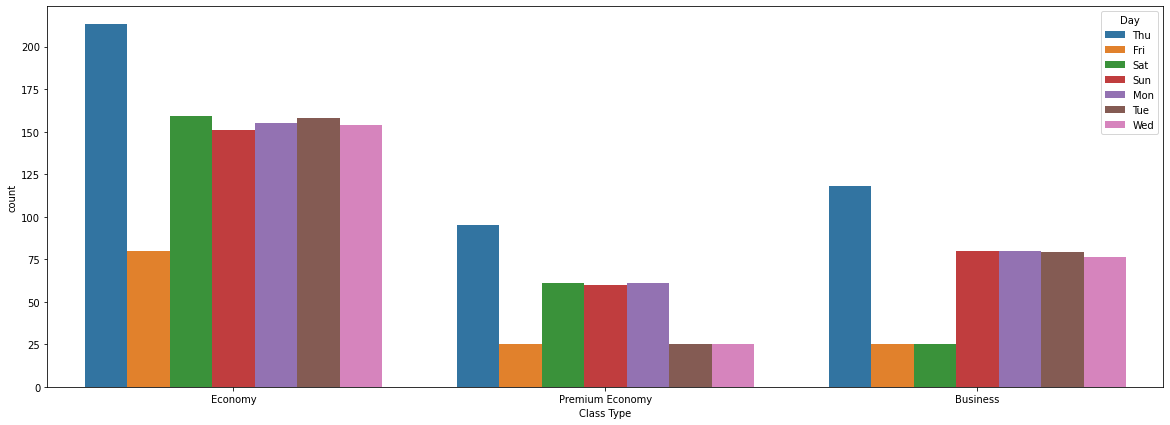

Day VS Airline


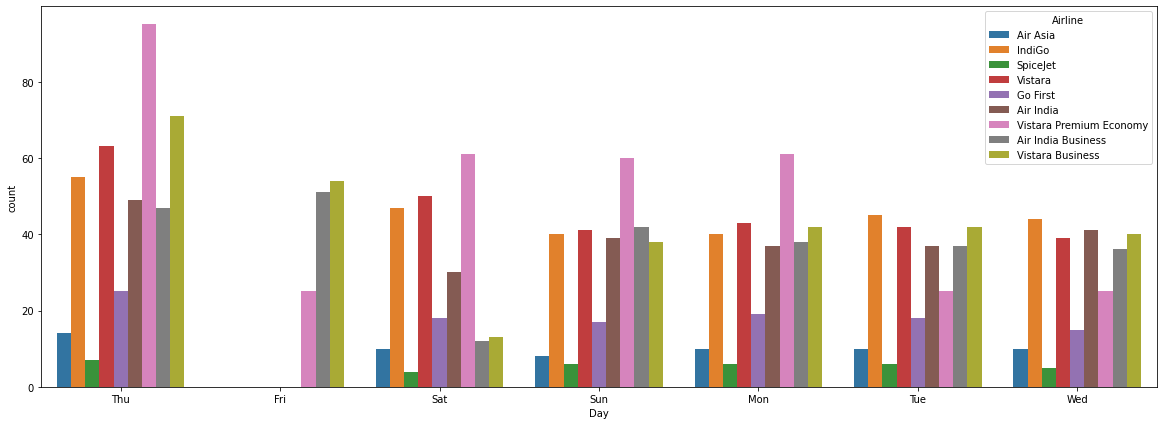

Day VS Date


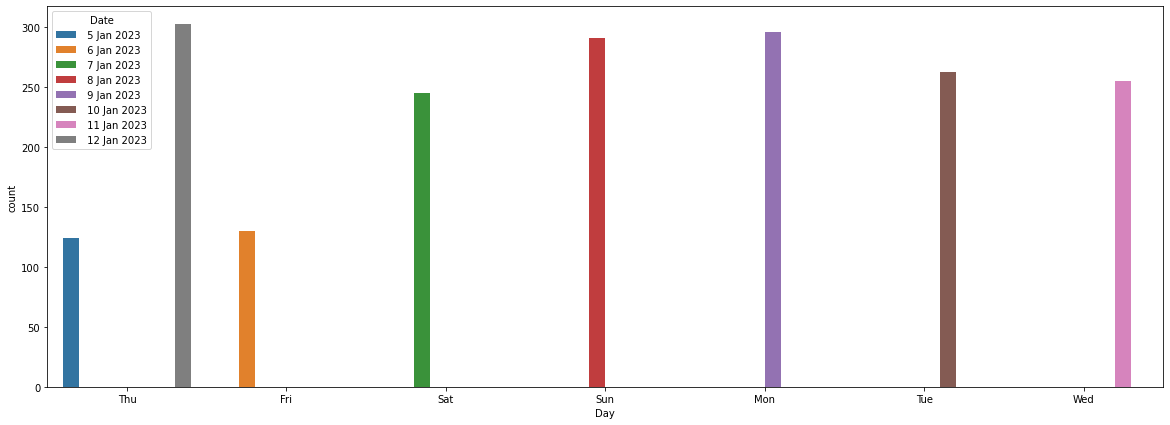

Day VS Stops


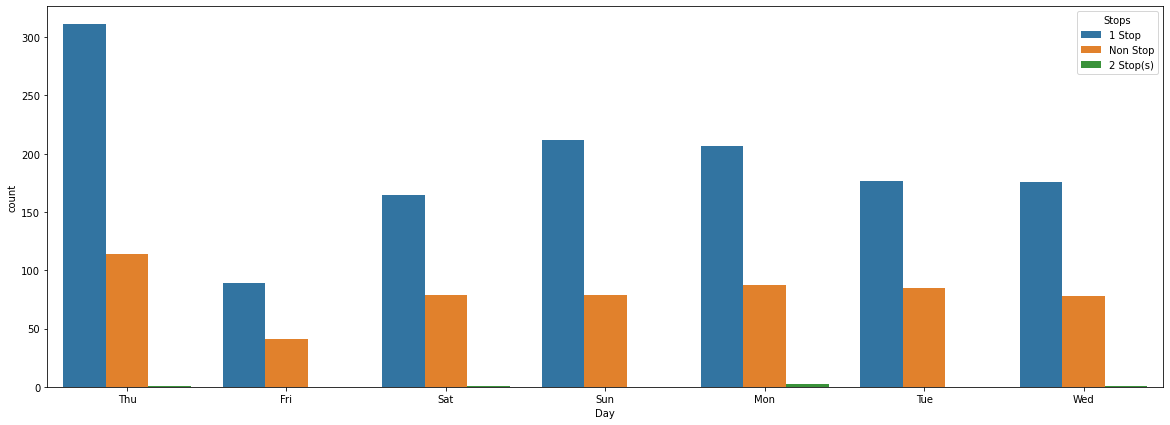

Day VS Class Type


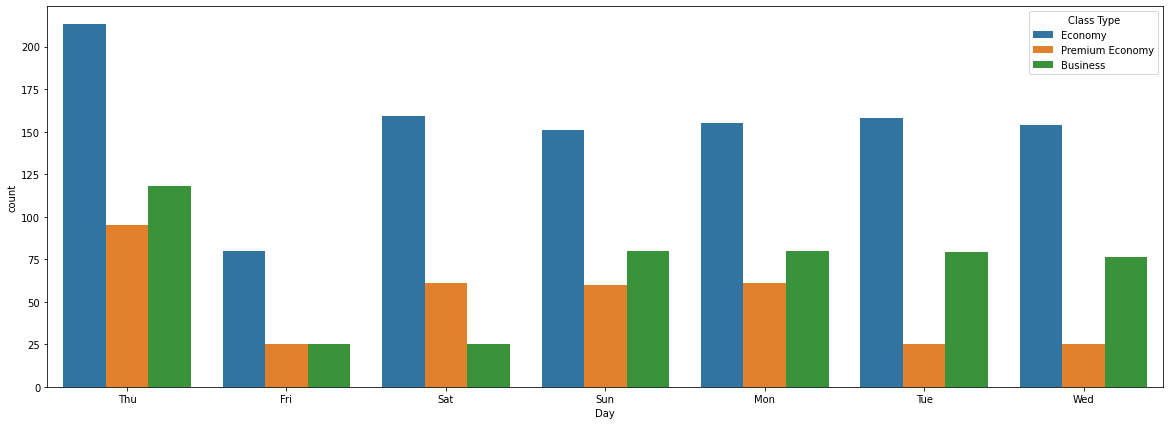

In [29]:
for i in categorical_column:
    for j in categorical_column:
        if i == j:
            continue
        print(i,'VS',j)
        plt.figure(figsize=(20,7))
        sns.countplot(x= df[i],hue=df[j])
        plt.xticks()
        plt.xlabel(i)
        plt.show()

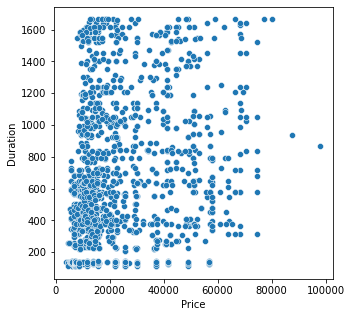

In [30]:
plt.figure(figsize=(5,5))
sns.scatterplot(x= df['Price'],y=df['Duration'])
plt.xlabel("Price")
plt.ylabel("Duration")
plt.show()

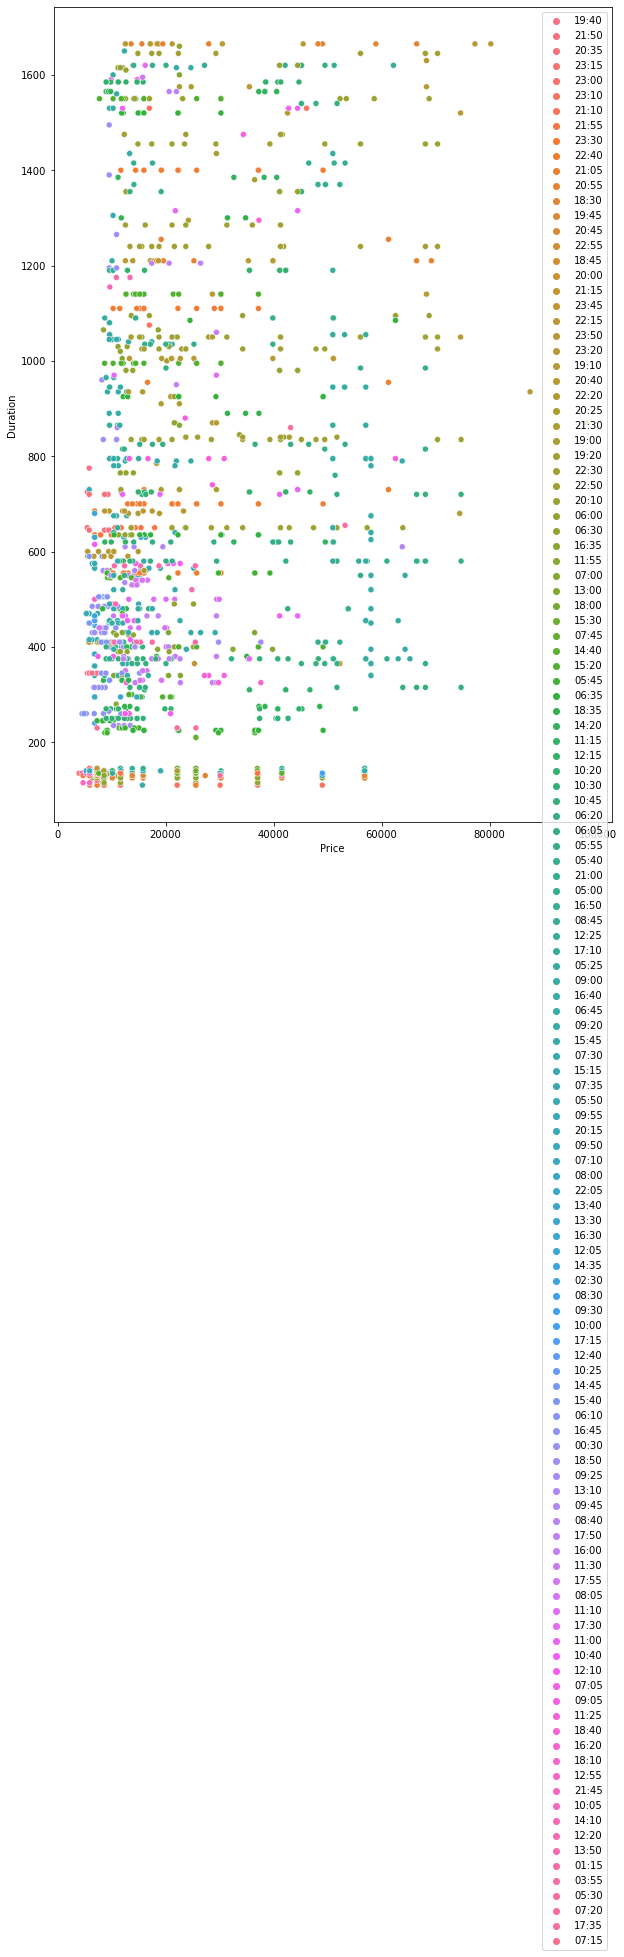

In [31]:
plt.figure(figsize=(10,15))
sns.scatterplot(x= df['Price'],y=df['Duration'],hue=df['Departure_Time'])
plt.legend()
plt.xlabel("Price")
plt.ylabel("Duration")
plt.show()

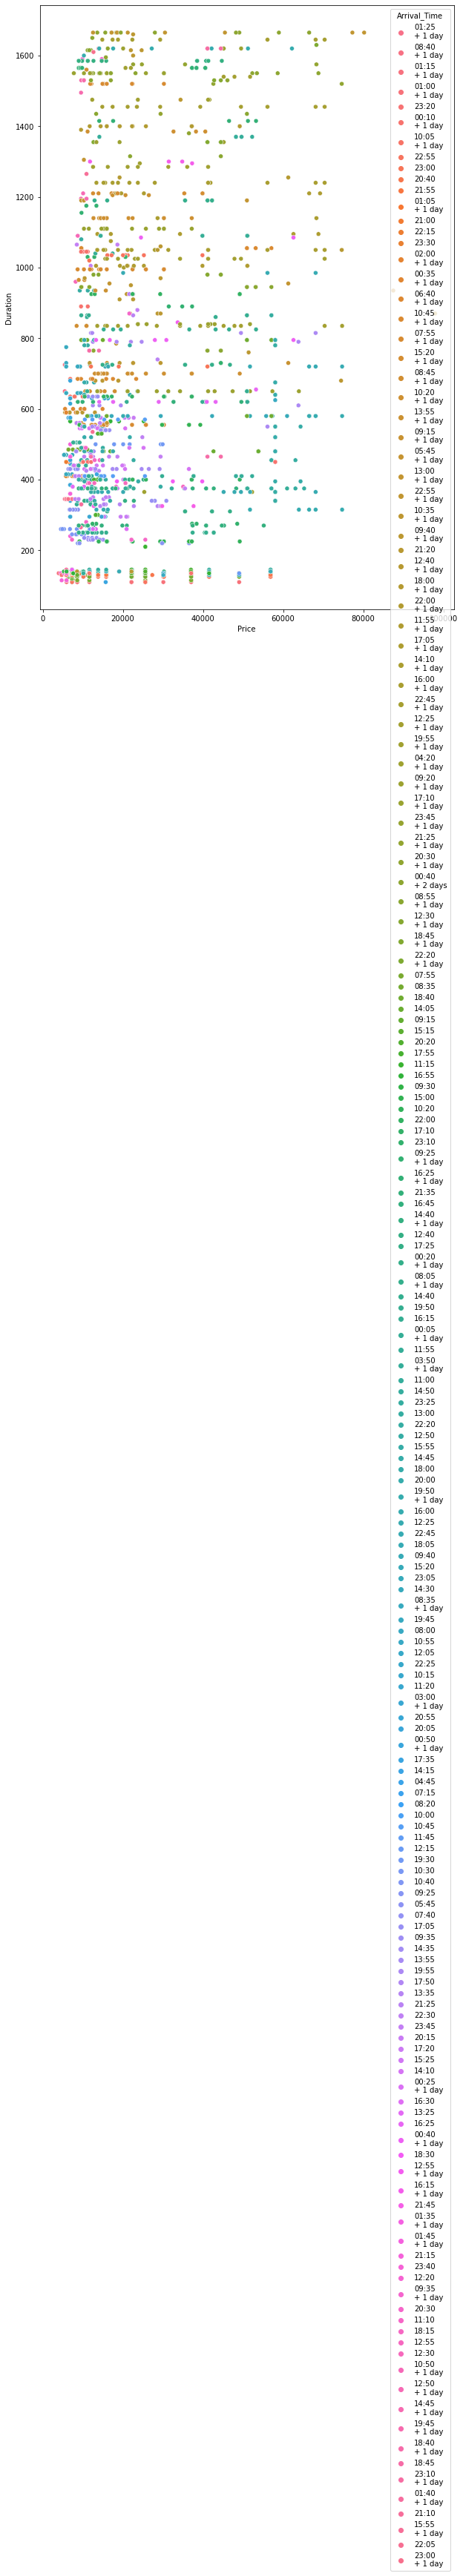

In [32]:
plt.figure(figsize=(10,15))
sns.scatterplot(x= df['Price'],y=df['Duration'],hue=df['Arrival_Time'])
plt.xlabel("Price")
plt.ylabel("Duration")
plt.show()

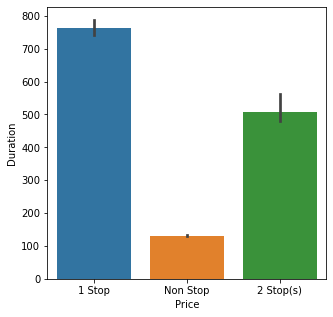

In [33]:
plt.figure(figsize=(5,5))
sns.barplot(x= df['Stops'],y=df['Duration'])
plt.xlabel("Price")
plt.ylabel("Duration")
plt.show()

##### Observation feature vs feature 
1.	Nonstop flights are less expensive than one-stop flights.
2.	Vistara Premium Airlines does not offer economy or business class seats. 
3.	Air India Business and Vistara Business provide business and economy classes.
4.	Sunday flight tickets are more expensive than other days.
5.	Vistara Business and Air India Business charge higher prices in economy class than other airline companies.
6.	Vistara Business and Air India Business are the only companies that provide business-class seats.
7.	Next-day economy class tickets are more expensive than another day.
8.	Only economy class seats are available on Air Asia, Indigo, Spicejet, Vistara, Go First, and Air India. 
9.	Only Vistara Premium Economy, Air India Business, and Vistara Business companies go from Mumbai to Delhi on Friday.
10.	Air Asia and Spicejet have very few flights from Mumbai to Delhi.
11.	Vistara Premium Airlines has the highest frequency among all airlines.
12.	Air India Business, Indigo, and Vistara have very frequent flights.
13.	All Air Asia flights are one-stop.
14.	Indigo Airlines and Vistara Airlines have the most seats in economy class.
15.	An airline flight ticket has no relationship between duration and price
16. A non-stop flight takes very little time to go from Mumbai to Delhi.


# Data Pre-processing

## Feature selection and encoding

In [34]:
df.columns

Index(['Airline', 'Date', 'Departure_Time', 'Source', 'Arrival_Time',
       'Destination', 'Stops', 'Duration', 'Price', 'Class Type', 'Day'],
      dtype='object')

In [35]:
Categorical = ['Airline', 'Date', 'Departure_Time', 'Source', 'Arrival_Time','Destination', 'Stops', 'Class Type', 'Day']

Numerical = ['Duration', 'Price']

In [36]:
from sklearn.preprocessing import LabelEncoder

leb_enc = LabelEncoder()
for i in Categorical:
    df[i] =leb_enc.fit_transform(df[i])

df.head()

,Airline,Date,Departure_Time,Source,Arrival_Time,Destination,Stops,Duration,Price,Class Type,Day
0,0,3,97,0,11,0,0,345,5505,1,4
1,0,3,113,0,32,0,0,650,5505,1,4
2,0,3,103,0,32,0,0,725,5505,1,4
3,4,3,124,0,11,0,2,130,5899,1,4
4,5,3,122,0,10,0,2,135,5938,1,4


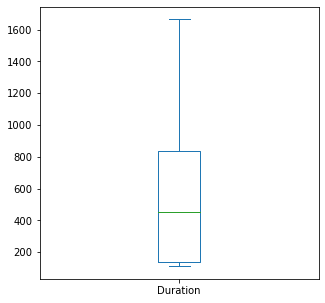

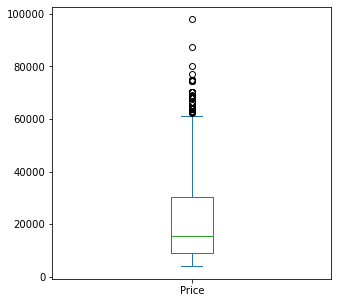

In [37]:
for i in Numerical:
    plt.figure(figsize=(5,5))
    df[i].plot(kind='box')
    plt.show()

### Outlier is present in price column
### Data is scraped from website and that's why data is error free so here is no need to outlier detection beacause data is realistic

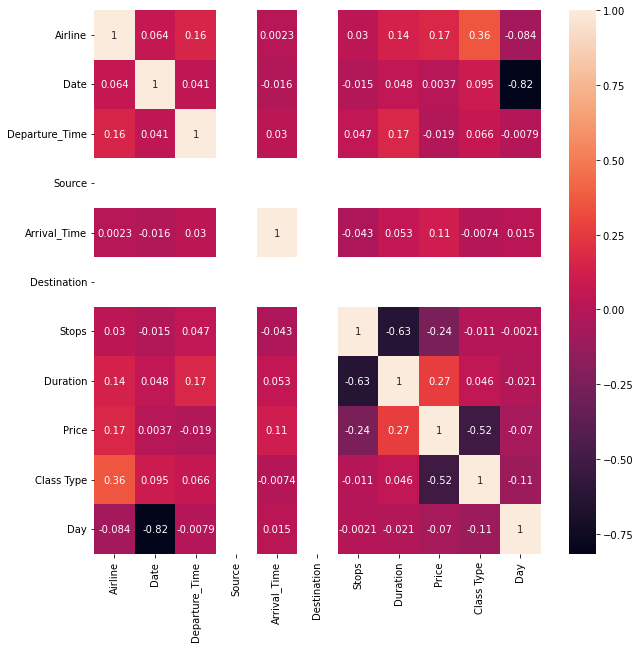

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),linecolor='black', annot=True)
plt.show()

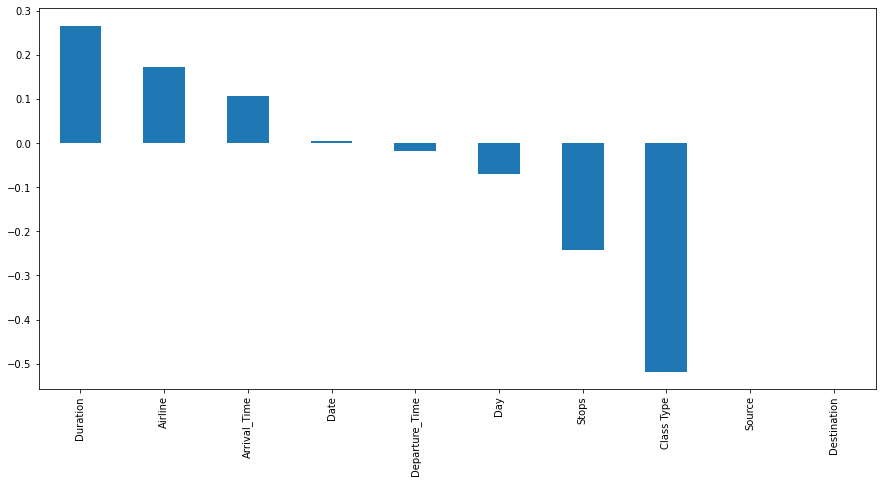

In [39]:
plt.figure(figsize = (15,7))
df.corr()['Price'].drop(['Price']).sort_values(ascending=False).plot(kind='bar')
plt.show()

### 1. Source and Destination has no relation with price beacuse there is only 1 source and destination 

### 2. Class Type, Duration and Airline have strong relationship with Price respectively.

### 3. Date and Departure time have poor relationship with price

In [40]:
#Droping Sourece and destination column from data set

df.drop(columns=['Source','Destination'],inplace=True)
df.head()

,Airline,Date,Departure_Time,Arrival_Time,Stops,Duration,Price,Class Type,Day
0,0,3,97,11,0,345,5505,1,4
1,0,3,113,32,0,650,5505,1,4
2,0,3,103,32,0,725,5505,1,4
3,4,3,124,11,2,130,5899,1,4
4,5,3,122,10,2,135,5938,1,4


# Model Building

In [41]:
pip install xgboost

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [43]:
x = df.drop(['Price'], axis=1)
y = df['Price']

In [44]:
scaler = StandardScaler()

X_scale = scaler.fit_transform(x)

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, random_state=18, test_size=0.20)

# Linear Regration

In [46]:
lin_reg= LinearRegression()
lin_reg.fit(X_train, Y_train)
y_pred = lin_reg.predict(X_test)
print('Error :')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('*-*'*20)
print('R2 Score :')
print(r2_score(Y_test,y_pred)*100)

Error :
Mean absolute error : 10030.682374982458
Mean squared error : 159422238.85651204
Root Mean squared error : 12626.251971844695
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
R2 Score :
44.21134714544067


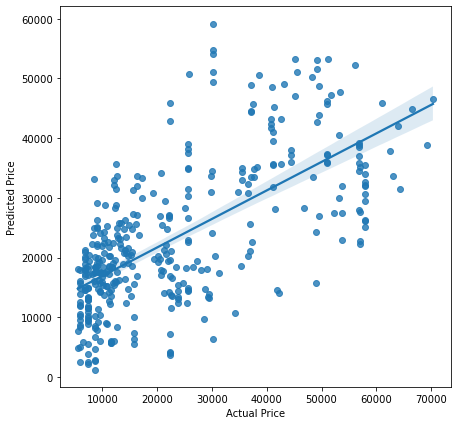

In [47]:
plt.figure(figsize=(7,7))
sns.regplot(x=Y_test,y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

# Random Forest

In [48]:
forest_reg= RandomForestRegressor()
forest_reg.fit(X_train, Y_train)
y_pred = forest_reg.predict(X_test)
print('Error :')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('*-*'*20)
print('R2 Score :')
print(r2_score(Y_test,y_pred)*100)

Error :
Mean absolute error : 3863.3981102362204
Mean squared error : 36197490.62466247
Root Mean squared error : 6016.4350428357875
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
R2 Score :
87.3329514555179


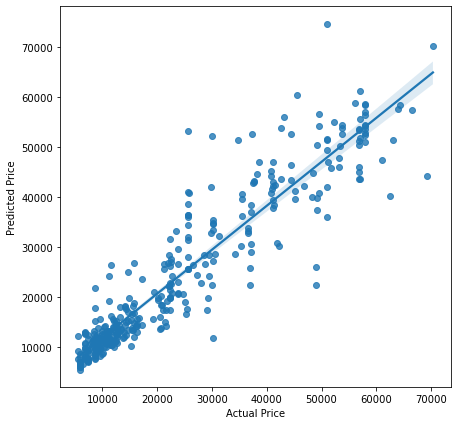

In [49]:
plt.figure(figsize=(7,7))
sns.regplot(x=Y_test,y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

# Decision Tree

In [50]:
Dt_reg= DecisionTreeRegressor()
Dt_reg.fit(X_train, Y_train)
y_pred = Dt_reg.predict(X_test)
print('Error :')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('*-*'*20)
print('R2 Score :')
print(r2_score(Y_test,y_pred)*100)

Error :
Mean absolute error : 4426.451443569554
Mean squared error : 52150956.61942257
Root Mean squared error : 7221.561923810013
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
R2 Score :
81.75015207575412


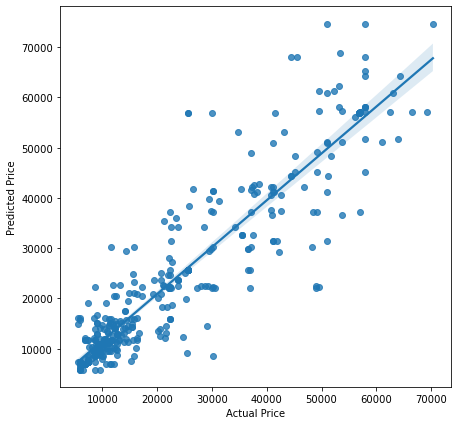

In [51]:
plt.figure(figsize=(7,7))
sns.regplot(x=Y_test,y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

# SVR

In [52]:
svr_reg= SVR()
svr_reg.fit(X_train, Y_train)
y_pred = svr_reg.predict(X_test)
print('Error :')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('*-*'*20)
print('R2 Score :')
print(r2_score(Y_test,y_pred)*100)

Error :
Mean absolute error : 13360.68560821435
Mean squared error : 345842739.3316843
Root Mean squared error : 18596.84756435037
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
R2 Score :
-21.025150977906158


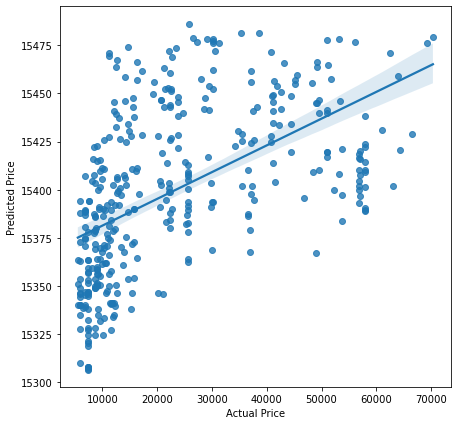

In [53]:
plt.figure(figsize=(7,7))
sns.regplot(x=Y_test,y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

# XGBOOST

In [54]:
xgb_reg= XGBRegressor()
xgb_reg.fit(X_train, Y_train)
y_pred = xgb_reg.predict(X_test)
print('Error :')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('*-*'*20)
print('R2 Score :')
print(r2_score(Y_test,y_pred)*100)

Error :
Mean absolute error : 3818.05411207144
Mean squared error : 33735344.64068408
Root Mean squared error : 5808.213549851976
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
R2 Score :
88.19456153302437


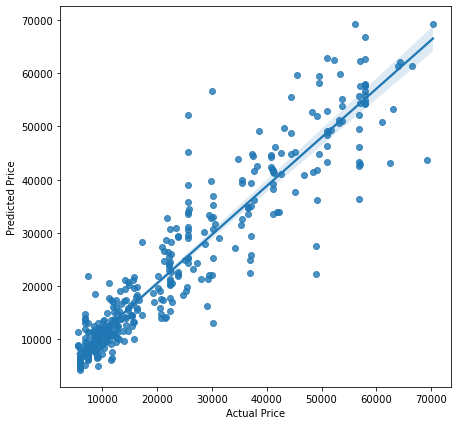

In [55]:
plt.figure(figsize=(7,7))
sns.regplot(x=Y_test,y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

# Cross validation score

## Linear Regression

In [60]:
from sklearn.model_selection import cross_val_score

In [63]:
score = cross_val_score(lin_reg, X_scale, y, cv=7)
print('Cross Validation Score :',lin_reg,":")
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :
Mean CV Score : 0.2799472938307802


## Rnadom Forest

In [64]:
score = cross_val_score(forest_reg, X_scale, y, cv=7)
print('Cross Validation Score :',forest_reg,":")
print("Mean CV Score :",score.mean())

Cross Validation Score : RandomForestRegressor() :
Mean CV Score : 0.6568602329698413


## Decision Tree

In [65]:
score = cross_val_score(Dt_reg, X_scale, y, cv=7)
print('Cross Validation Score :',Dt_reg,":")
print("Mean CV Score :",score.mean())

Cross Validation Score : DecisionTreeRegressor() :
Mean CV Score : 0.5082085912175064


## SVR

In [66]:
score = cross_val_score(svr_reg, X_scale, y, cv=7)
print('Cross Validation Score :',svr_reg,":")
print("Mean CV Score :",score.mean())

Cross Validation Score : SVR() :
Mean CV Score : -0.217427242243016


## XGBoost

In [67]:
score = cross_val_score(xgb_reg, X_scale, y, cv=7)
print('Cross Validation Score :',xgb_reg,":")
print("Mean CV Score :",score.mean())

Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) :
Mean CV Score : 0.6507157062673604


### XGBoost and RandomForest giving highest R2 score respectively.
### for hyper parameter tuning chosing above 2 models.

# Hyper Parameter Tuning 

## XGBoost

In [68]:
from sklearn.model_selection import GridSearchCV

In [73]:
parameter = {'n_estimators':[200,300],'gamma':np.arange(0,0.2,0.1),
              'booster' : ['gbtree','dart','gblinear'], 'max_depth':[6,8],
              'eta' : [0.01, 0.1] }

In [74]:
Grid_cv = GridSearchCV(XGBRegressor(),parameter)

In [75]:
Grid_cv.fit(X_train,Y_train)

[17:13:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[17:13:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[17:13:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[17:13:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[17:13:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: 

[17:13:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[17:13:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[17:13:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[17:13:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[17:13:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: 

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
   

In [76]:
Grid_cv.best_params_

{'booster': 'gbtree',
 'eta': 0.1,
 'gamma': 0.0,
 'max_depth': 6,
 'n_estimators': 300}

In [56]:
xgb_reg_2 = XGBRegressor(booster='gbtree', max_depth=6, eta=0.1,n_estimators=400, gamma=0.1)
xgb_reg_2.fit(X_train, Y_train)
y_pred = xgb_reg_2.predict(X_test)
print('Error of XGB Regressor:')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('R2 Score of XGB Regressor :')
print(r2_score(Y_test,y_pred)*100)

Error of XGB Regressor:
Mean absolute error : 3771.9731296329046
Mean squared error : 32252889.607631993
Root Mean squared error : 5679.162755867452
R2 Score of XGB Regressor :
88.71333588850106


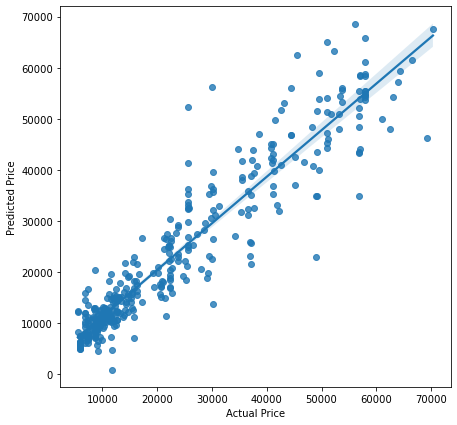

In [57]:
plt.figure(figsize=(7,7))
sns.regplot(x=Y_test,y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

## Random Forest

In [78]:
parameter = {'n_estimators':[100,200,300],
             'criterion':["squared_error", "absolute_error", "poisson"],
            'max_depth':[6,7,8],
            'min_samples_split':[2,3,4]}

In [79]:
Grid_cv = GridSearchCV(RandomForestRegressor(),parameter)

In [80]:
Grid_cv.fit(X_train,Y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [6, 7, 8], 'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200, 300]})

In [81]:
Grid_cv.best_params_

{'criterion': 'absolute_error',
 'max_depth': 8,
 'min_samples_split': 4,
 'n_estimators': 100}

In [58]:
forest_reg_2= RandomForestRegressor(criterion='absolute_error',max_depth=8,min_samples_split=4,n_estimators=100)
forest_reg_2.fit(X_train, Y_train)
y_pred = forest_reg_2.predict(X_test)
print('Error :')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('*-*'*20)
print('R2 Score :')
print(r2_score(Y_test,y_pred)*100)

Error :
Mean absolute error : 4135.418044619422
Mean squared error : 36480152.73113471
Root Mean squared error : 6039.880191786482
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
R2 Score :
87.23403590743484


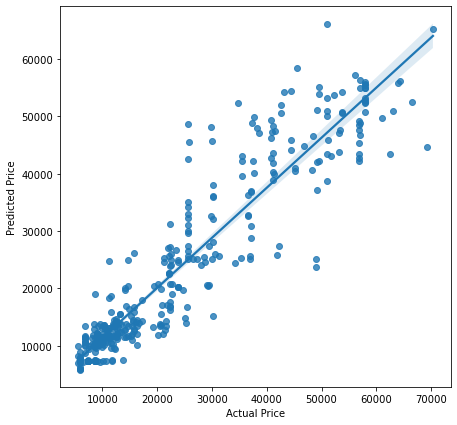

In [59]:
plt.figure(figsize=(7,7))
sns.regplot(x=Y_test,y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

# Model after Droping (Date,Departure time)

In [83]:
x.head()

,Airline,Date,Departure_Time,Arrival_Time,Stops,Duration,Class Type,Day
0,0,3,97,11,0,345,1,4
1,0,3,113,32,0,650,1,4
2,0,3,103,32,0,725,1,4
3,4,3,124,11,2,130,1,4
4,5,3,122,10,2,135,1,4


In [84]:
x.drop(columns=['Date','Departure_Time'],inplace=True)
x.head()

,Airline,Arrival_Time,Stops,Duration,Class Type,Day
0,0,11,0,345,1,4
1,0,32,0,650,1,4
2,0,32,0,725,1,4
3,4,11,2,130,1,4
4,5,10,2,135,1,4


In [85]:
X_scale = scaler.fit_transform(x)

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, random_state=18, test_size=0.20)

## XGBoost

In [88]:
xgb_reg_2 = XGBRegressor(booster='gbtree', max_depth=6, eta=0.1,n_estimators=400, gamma=0.1)
xgb_reg_2.fit(X_train, Y_train)
y_pred = xgb_reg_2.predict(X_test)
print('Error of XGB Regressor:')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('R2 Score of XGB Regressor :')
print(r2_score(Y_test,y_pred)*100)

Error of XGB Regressor:
Mean absolute error : 4064.118031098774
Mean squared error : 38447918.06198259
Root Mean squared error : 6200.63852050598
R2 Score of XGB Regressor :
86.54543074337919


## RandomForest

In [89]:
forest_reg_2= RandomForestRegressor(criterion='absolute_error',max_depth=8,min_samples_split=4,n_estimators=100)
forest_reg_2.fit(X_train, Y_train)
y_pred = forest_reg_2.predict(X_test)
print('Error :')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('*-*'*20)
print('R2 Score :')
print(r2_score(Y_test,y_pred)*100)

Error :
Mean absolute error : 4291.623477690289
Mean squared error : 42547672.21252526
Root Mean squared error : 6522.85767225725
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
R2 Score :
85.11075159990332


### XGBoost is highest r2 score after hyperparamete tuning

# Save Final Model

In [92]:
import joblib

In [95]:
joblib.dump(xgb_reg_2,"Flight price prediction model.pkl")

['Flight price prediction model.pkl']

# Prediction 

In [96]:
model = joblib.load("Flight price prediction model.pkl")

# Prediction
prediction = model.predict(X_test)
prediction

array([40588.664 , 41593.895 , 53272.777 , 36729.164 ,  9814.681 ,
       23045.54  ,  9889.665 , 44947.65  ,  5555.545 , 62413.43  ,
       42793.92  ,  7287.872 , 57993.094 , 21707.91  , 17384.994 ,
       45446.83  , 17143.91  , 29236.213 ,  7405.8296, 10121.145 ,
       22107.625 , 12711.706 ,  9228.503 ,  4789.3784, 51143.83  ,
       14086.558 , 62740.727 , 20630.223 , 54732.645 ,  8329.86  ,
       13907.551 , 18628.906 , 28495.732 ,  9252.605 , 22590.004 ,
        1960.0023, 16633.436 , 12642.849 , 16403.744 , 23030.549 ,
       27577.734 , 29937.242 ,  9363.418 , 26770.182 , 26001.955 ,
       19780.56  , 10391.481 , 22602.254 , 25312.8   , 17996.88  ,
       56998.71  ,  6463.2476, 12182.233 , 51527.273 , 56242.49  ,
       12472.084 , 39605.117 , 10848.334 ,  9944.048 , 26990.38  ,
       11988.748 ,  6592.4375, 21227.766 , 21505.613 , 20701.799 ,
       10080.327 , 11091.007 , 46417.09  , 13947.478 , 45870.895 ,
       12153.876 , 52913.94  ,  7402.3086, 26456.697 ,  7629.2

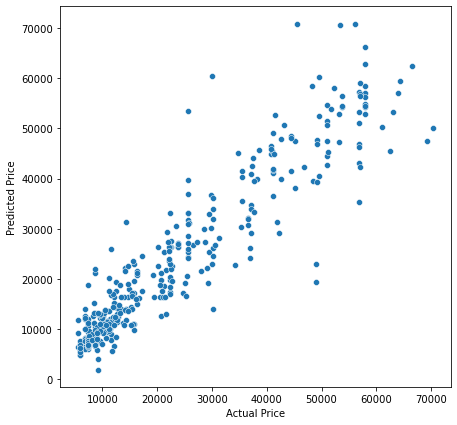

In [97]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=Y_test,y=prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()